# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:14:52.912892: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:14:57.121437
2025-04-15 00:14:57.121437


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:14:50"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

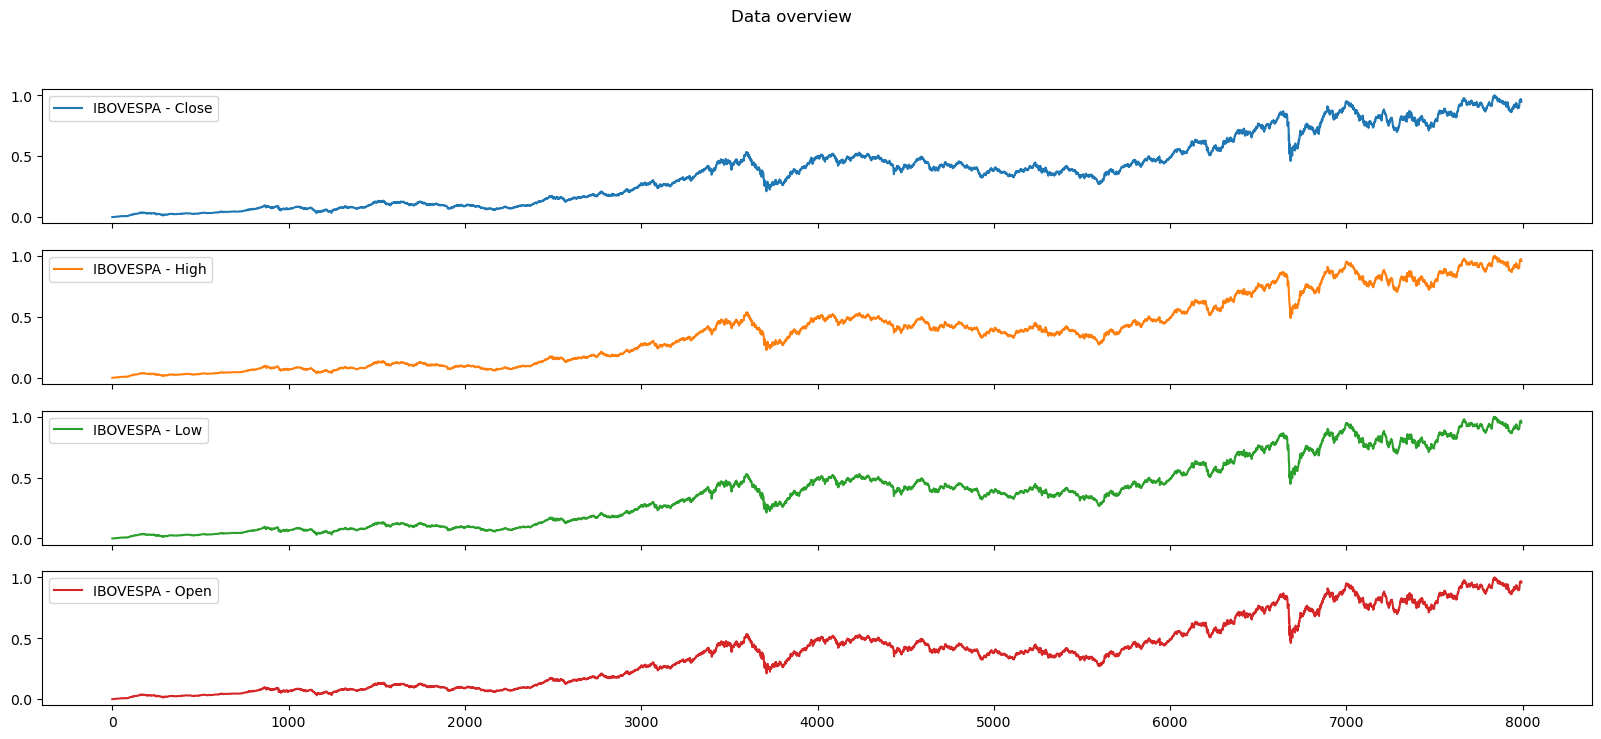

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

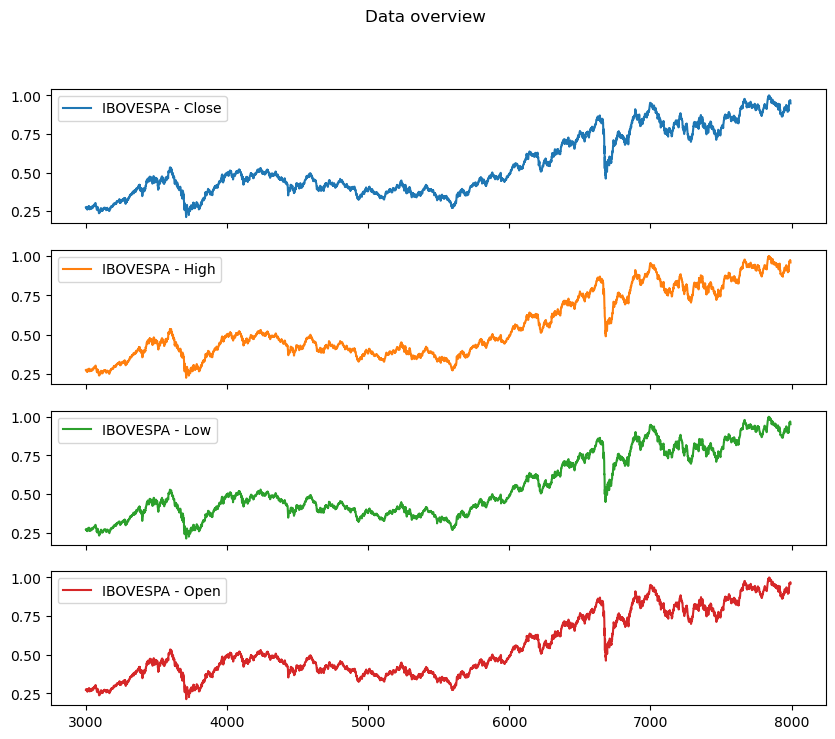

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

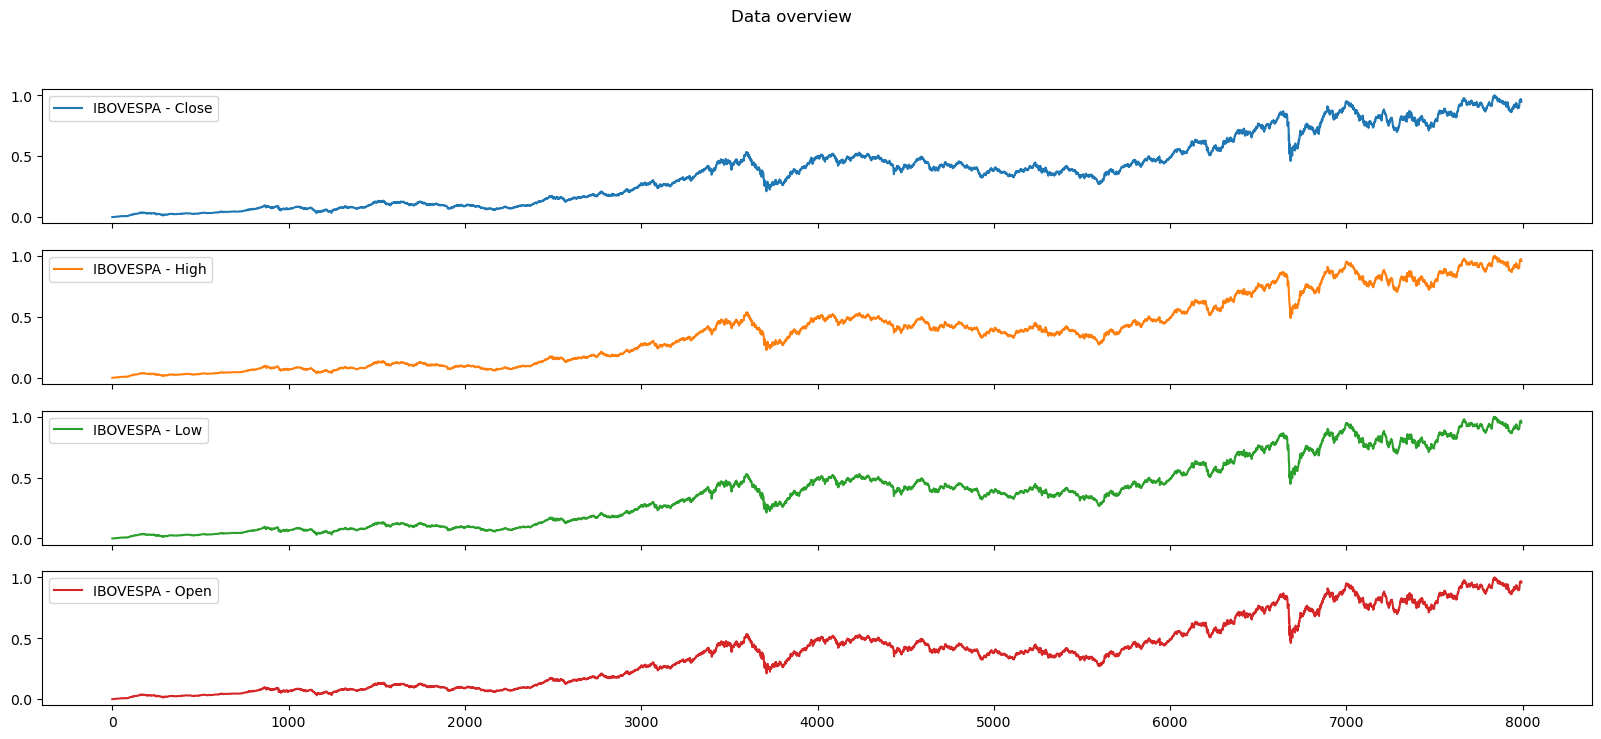

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

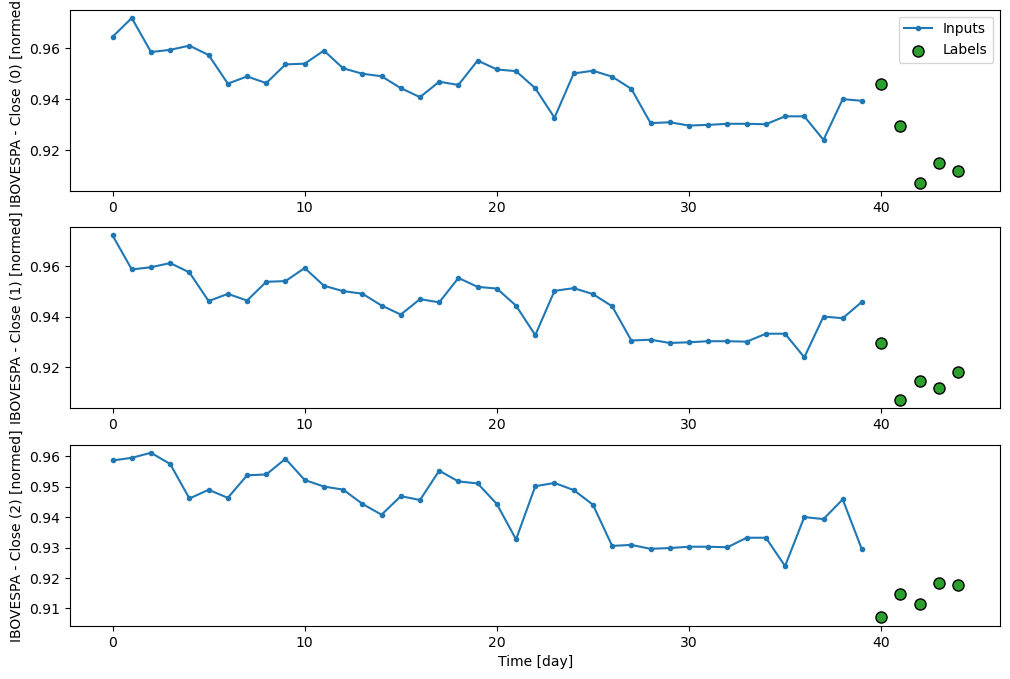

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 20:02 5s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 74.9451 - mean_squared_error: 6.6731e-05 - root_mean_squared_error: 0.0080 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 64.7285 - mean_squared_error: 7.6712e-05 - root_mean_squared_error: 0.0086

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 57.5065 - mean_squared_error: 7.6328e-05 - root_mean_squared_error: 0.0086 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 54.6097 - mean_squared_error: 7.4724e-05 - root_mean_squared_error: 0.0085

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 52.1102 - mean_squared_error: 7.2947e-05 - root_mean_squared_error: 0.0084

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 48.0266 - mean_squared_error: 6.9301e-05 - root_mean_squared_error: 0.0082

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 44.9310 - mean_squared_error: 6.6532e-05 - root_mean_squared_error: 0.0081 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 42.4826 - mean_squared_error: 6.4223e-05 - root_mean_squared_error: 0.0079

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 40.3120 - mean_squared_error: 6.1840e-05 - root_mean_squared_error: 0.0078

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 38.3926 - mean_squared_error: 5.9569e-05 - root_mean_squared_error: 0.0076

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 36.6769 - mean_squared_error: 5.7409e-05 - root_mean_squared_error: 0.0075

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.1600 - mean_squared_error: 5.5571e-05 - root_mean_squared_error: 0.0074

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 33.8560 - mean_squared_error: 5.4474e-05 - root_mean_squared_error: 0.0073

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 32.7239 - mean_squared_error: 5.4903e-05 - root_mean_squared_error: 0.0073

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 31.8050 - mean_squared_error: 5.7933e-05 - root_mean_squared_error: 0.0075

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 30.9978 - mean_squared_error: 6.0995e-05 - root_mean_squared_error: 0.0077

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 30.2794 - mean_squared_error: 6.4202e-05 - root_mean_squared_error: 0.0079

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 29.6390 - mean_squared_error: 6.7331e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 29.1614 - mean_squared_error: 7.1680e-05 - root_mean_squared_error: 0.0082

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 28.7426 - mean_squared_error: 7.5708e-05 - root_mean_squared_error: 0.0085

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 28.3897 - mean_squared_error: 8.0620e-05 - root_mean_squared_error: 0.0087

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 28.2336 - mean_squared_error: 8.3280e-05 - root_mean_squared_error: 0.0088

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 27.9389 - mean_squared_error: 8.8350e-05 - root_mean_squared_error: 0.0090

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 27.6576 - mean_squared_error: 9.3209e-05 - root_mean_squared_error: 0.0093

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 27.3856 - mean_squared_error: 9.8045e-05 - root_mean_squared_error: 0.0095

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.1279 - mean_squared_error: 1.0299e-04 - root_mean_squared_error: 0.0097

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.0019 - mean_squared_error: 1.0535e-04 - root_mean_squared_error: 0.0098

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.7473 - mean_squared_error: 1.0960e-04 - root_mean_squared_error: 0.0100

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.4954 - mean_squared_error: 1.1340e-04 - root_mean_squared_error: 0.0102

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.3719 - mean_squared_error: 1.1517e-04 - root_mean_squared_error: 0.0102

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.2500 - mean_squared_error: 1.1686e-04 - root_mean_squared_error: 0.0103

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.1302 - mean_squared_error: 1.1847e-04 - root_mean_squared_error: 0.0104

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 26.0179 - mean_squared_error: 1.2013e-04 - root_mean_squared_error: 0.0105

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 25.7953 - mean_squared_error: 1.2319e-04 - root_mean_squared_error: 0.0106

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 25.5819 - mean_squared_error: 1.2607e-04 - root_mean_squared_error: 0.0107

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 25.3743 - mean_squared_error: 1.2868e-04 - root_mean_squared_error: 0.0108

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 25.1872 - mean_squared_error: 1.3128e-04 - root_mean_squared_error: 0.0110

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 25.0104 - mean_squared_error: 1.3373e-04 - root_mean_squared_error: 0.0111

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 24.8343 - mean_squared_error: 1.3593e-04 - root_mean_squared_error: 0.0112

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 24.6712 - mean_squared_error: 1.3822e-04 - root_mean_squared_error: 0.0113

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.5273 - mean_squared_error: 1.4137e-04 - root_mean_squared_error: 0.0114

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 24.4081 - mean_squared_error: 1.4722e-04 - root_mean_squared_error: 0.0116

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 24.3082 - mean_squared_error: 1.5530e-04 - root_mean_squared_error: 0.0118

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 24.2133 - mean_squared_error: 1.6339e-04 - root_mean_squared_error: 0.0121

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 24.1197 - mean_squared_error: 1.7122e-04 - root_mean_squared_error: 0.0123

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 24.0727 - mean_squared_error: 1.7500e-04 - root_mean_squared_error: 0.0125

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 23.9808 - mean_squared_error: 1.8257e-04 - root_mean_squared_error: 0.0127

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 23.8877 - mean_squared_error: 1.8984e-04 - root_mean_squared_error: 0.0129

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 23.7911 - mean_squared_error: 1.9660e-04 - root_mean_squared_error: 0.0131

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 23.6914 - mean_squared_error: 2.0289e-04 - root_mean_squared_error: 0.0133

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 23.6403 - mean_squared_error: 2.0587e-04 - root_mean_squared_error: 0.0134

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 23.5902 - mean_squared_error: 2.0900e-04 - root_mean_squared_error: 0.0135

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 23.4893 - mean_squared_error: 2.1508e-04 - root_mean_squared_error: 0.0137

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 23.3883 - mean_squared_error: 2.2098e-04 - root_mean_squared_error: 0.0139

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 23.2912 - mean_squared_error: 2.2765e-04 - root_mean_squared_error: 0.0140

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 23.1976 - mean_squared_error: 2.3520e-04 - root_mean_squared_error: 0.0143

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 23.1040 - mean_squared_error: 2.4268e-04 - root_mean_squared_error: 0.0145

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 23.0113 - mean_squared_error: 2.5042e-04 - root_mean_squared_error: 0.0147

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 22.9202 - mean_squared_error: 2.5899e-04 - root_mean_squared_error: 0.0149

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 22.8289 - mean_squared_error: 2.6760e-04 - root_mean_squared_error: 0.0151

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 22.7829 - mean_squared_error: 2.7175e-04 - root_mean_squared_error: 0.0152

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 22.7367 - mean_squared_error: 2.7588e-04 - root_mean_squared_error: 0.0153

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 22.6918 - mean_squared_error: 2.8072e-04 - root_mean_squared_error: 0.0155

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 22.6489 - mean_squared_error: 2.8659e-04 - root_mean_squared_error: 0.0156

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 22.5755 - mean_squared_error: 3.0442e-04 - root_mean_squared_error: 0.0159

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 22.5093 - mean_squared_error: 3.2431e-04 - root_mean_squared_error: 0.0163

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 22.4442 - mean_squared_error: 3.4403e-04 - root_mean_squared_error: 0.0167

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 22.3839 - mean_squared_error: 3.6628e-04 - root_mean_squared_error: 0.0171

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 22.3314 - mean_squared_error: 3.9687e-04 - root_mean_squared_error: 0.0176

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 22.2869 - mean_squared_error: 4.3790e-04 - root_mean_squared_error: 0.0182

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 22.2672 - mean_squared_error: 4.6176e-04 - root_mean_squared_error: 0.0185

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 22.2308 - mean_squared_error: 5.1136e-04 - root_mean_squared_error: 0.0192

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 22.1958 - mean_squared_error: 5.6122e-04 - root_mean_squared_error: 0.0198

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 22.1629 - mean_squared_error: 6.1276e-04 - root_mean_squared_error: 0.0204

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 22.1292 - mean_squared_error: 6.6301e-04 - root_mean_squared_error: 0.0211

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 22.0926 - mean_squared_error: 7.1095e-04 - root_mean_squared_error: 0.0217

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 22.0547 - mean_squared_error: 7.5697e-04 - root_mean_squared_error: 0.0223

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 22.0149 - mean_squared_error: 8.0103e-04 - root_mean_squared_error: 0.0228

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 21.9752 - mean_squared_error: 8.4407e-04 - root_mean_squared_error: 0.0234

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 21.9344 - mean_squared_error: 8.8555e-04 - root_mean_squared_error: 0.0239

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 21.8919 - mean_squared_error: 9.2524e-04 - root_mean_squared_error: 0.0244

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 21.8476 - mean_squared_error: 9.6321e-04 - root_mean_squared_error: 0.0249

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 21.8019 - mean_squared_error: 9.9959e-04 - root_mean_squared_error: 0.0254

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 21.7562 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0259    

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 21.7107 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0263

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 21.6640 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0268

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 21.6160 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 21.5679 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0276

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 21.5209 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0280

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 21.4743 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0284

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 21.4268 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0287

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 21.3787 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0291

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 21.3304 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0294

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 21.2835 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0298

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 21.2391 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0301

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 21.1945 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0305

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 21.1498 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0308

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 21.1063 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.0643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.0235 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0317

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 20.9837 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0320

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 20.9450 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0324

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 20.9074 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0327

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 20.8703 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0330

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 20.8330 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 20.7952 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 20.7568 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 20.7180 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0342

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.6785 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0344

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 20.6384 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0347

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 20.5978 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 20.5599 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0353

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 20.5238 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0356

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.4879 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 20.4523 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 20.4173 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0365

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 20.3834 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0368

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 20.3497 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 20.3156 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0375

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 20.2810 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0378

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 20.2465 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0381

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 20.2118 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 20.1766 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0387

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 20.1589 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0388

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 20.1233 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0391

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 20.0879 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 20.0529 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0396 - val_loss: 0.1379 - val_mean_absolute_error: 0.1379 - val_mean_absolute_percentage_error: 14.6733 - val_mean_squared_error: 0.0199 - val_root_mean_squared_error: 0.1410 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.7701 - mean_absolute_error: 0.7701 - mean_absolute_percentage_error: 10348.7041 - mean_squared_error: 0.5931 - root_mean_squared_error: 0.7701

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7683 - mean_absolute_error: 0.7683 - mean_absolute_percentage_error: 8649.3867 - mean_squared_error: 0.5904 - root_mean_squared_error: 0.7684  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7602 - mean_absolute_error: 0.7602 - mean_absolute_percentage_error: 7332.9976 - mean_squared_error: 0.5784 - root_mean_squared_error: 0.7605

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_absolute_percentage_error: 6435.3755 - mean_squared_error: 0.5526 - root_mean_squared_error: 0.7427

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8065 - mean_absolute_error: 0.8065 - mean_absolute_percentage_error: 6307.6343 - mean_squared_error: 0.8774 - root_mean_squared_error: 0.8924

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8635 - mean_absolute_error: 0.8635 - mean_absolute_percentage_error: 6230.2241 - mean_squared_error: 1.1025 - root_mean_squared_error: 0.9945

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8846 - mean_absolute_error: 0.8846 - mean_absolute_percentage_error: 6063.9717 - mean_squared_error: 1.2098 - root_mean_squared_error: 1.0479

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8846 - mean_absolute_error: 0.8846 - mean_absolute_percentage_error: 5857.5000 - mean_squared_error: 1.2560 - root_mean_squared_error: 1.0745

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8752 - mean_absolute_error: 0.8752 - mean_absolute_percentage_error: 5644.3135 - mean_squared_error: 1.2699 - root_mean_squared_error: 1.0860

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8602 - mean_absolute_error: 0.8602 - mean_absolute_percentage_error: 5434.2363 - mean_squared_error: 1.2657 - root_mean_squared_error: 1.0884

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8442 - mean_absolute_error: 0.8442 - mean_absolute_percentage_error: 5236.7881 - mean_squared_error: 1.2519 - root_mean_squared_error: 1.0855

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8270 - mean_absolute_error: 0.8270 - mean_absolute_percentage_error: 5050.6909 - mean_squared_error: 1.2322 - root_mean_squared_error: 1.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8100 - mean_absolute_error: 0.8100 - mean_absolute_percentage_error: 4876.6128 - mean_squared_error: 1.2094 - root_mean_squared_error: 1.0708

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7934 - mean_absolute_error: 0.7934 - mean_absolute_percentage_error: 4713.7607 - mean_squared_error: 1.1852 - root_mean_squared_error: 1.0610

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7773 - mean_absolute_error: 0.7773 - mean_absolute_percentage_error: 4561.8770 - mean_squared_error: 1.1604 - root_mean_squared_error: 1.0505

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7616 - mean_absolute_error: 0.7616 - mean_absolute_percentage_error: 4419.9004 - mean_squared_error: 1.1354 - root_mean_squared_error: 1.0395

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7466 - mean_absolute_error: 0.7466 - mean_absolute_percentage_error: 4287.3203 - mean_squared_error: 1.1109 - root_mean_squared_error: 1.0283

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7321 - mean_absolute_error: 0.7321 - mean_absolute_percentage_error: 4163.1509 - mean_squared_error: 1.0868 - root_mean_squared_error: 1.0170

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7180 - mean_absolute_error: 0.7180 - mean_absolute_percentage_error: 4046.9263 - mean_squared_error: 1.0634 - root_mean_squared_error: 1.0057

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.7045 - mean_absolute_error: 0.7045 - mean_absolute_percentage_error: 3937.8958 - mean_squared_error: 1.0407 - root_mean_squared_error: 0.9945

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_absolute_percentage_error: 3835.2014 - mean_squared_error: 1.0188 - root_mean_squared_error: 0.9835

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6789 - mean_absolute_error: 0.6789 - mean_absolute_percentage_error: 3738.2888 - mean_squared_error: 0.9976 - root_mean_squared_error: 0.9727

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6668 - mean_absolute_error: 0.6668 - mean_absolute_percentage_error: 3646.7979 - mean_squared_error: 0.9773 - root_mean_squared_error: 0.9621

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6552 - mean_absolute_error: 0.6552 - mean_absolute_percentage_error: 3560.1821 - mean_squared_error: 0.9577 - root_mean_squared_error: 0.9518

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6441 - mean_absolute_error: 0.6441 - mean_absolute_percentage_error: 3478.0847 - mean_squared_error: 0.9389 - root_mean_squared_error: 0.9417

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6334 - mean_absolute_error: 0.6334 - mean_absolute_percentage_error: 3400.1968 - mean_squared_error: 0.9208 - root_mean_squared_error: 0.9319

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6232 - mean_absolute_error: 0.6232 - mean_absolute_percentage_error: 3326.1487 - mean_squared_error: 0.9035 - root_mean_squared_error: 0.9223

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6133 - mean_absolute_error: 0.6133 - mean_absolute_percentage_error: 3255.6648 - mean_squared_error: 0.8867 - root_mean_squared_error: 0.9130

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6038 - mean_absolute_error: 0.6038 - mean_absolute_percentage_error: 3188.5422 - mean_squared_error: 0.8707 - root_mean_squared_error: 0.9040

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5947 - mean_absolute_error: 0.5947 - mean_absolute_percentage_error: 3124.5420 - mean_squared_error: 0.8553 - root_mean_squared_error: 0.8952

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 3063.4146 - mean_squared_error: 0.8404 - root_mean_squared_error: 0.8866

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5774 - mean_absolute_error: 0.5774 - mean_absolute_percentage_error: 3004.9880 - mean_squared_error: 0.8261 - root_mean_squared_error: 0.8783

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5692 - mean_absolute_error: 0.5692 - mean_absolute_percentage_error: 2949.0564 - mean_squared_error: 0.8123 - root_mean_squared_error: 0.8702

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5613 - mean_absolute_error: 0.5613 - mean_absolute_percentage_error: 2895.4773 - mean_squared_error: 0.7990 - root_mean_squared_error: 0.8623

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5536 - mean_absolute_error: 0.5536 - mean_absolute_percentage_error: 2844.1177 - mean_squared_error: 0.7862 - root_mean_squared_error: 0.8546

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5462 - mean_absolute_error: 0.5462 - mean_absolute_percentage_error: 2794.8286 - mean_squared_error: 0.7738 - root_mean_squared_error: 0.8471

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5390 - mean_absolute_error: 0.5390 - mean_absolute_percentage_error: 2747.4731 - mean_squared_error: 0.7618 - root_mean_squared_error: 0.8398

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5321 - mean_absolute_error: 0.5321 - mean_absolute_percentage_error: 2701.9148 - mean_squared_error: 0.7502 - root_mean_squared_error: 0.8326

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5253 - mean_absolute_error: 0.5253 - mean_absolute_percentage_error: 2658.0464 - mean_squared_error: 0.7390 - root_mean_squared_error: 0.8257

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5188 - mean_absolute_error: 0.5188 - mean_absolute_percentage_error: 2615.7798 - mean_squared_error: 0.7282 - root_mean_squared_error: 0.8189

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5125 - mean_absolute_error: 0.5125 - mean_absolute_percentage_error: 2575.0139 - mean_squared_error: 0.7177 - root_mean_squared_error: 0.8123

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 2535.6692 - mean_squared_error: 0.7076 - root_mean_squared_error: 0.8059

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5003 - mean_absolute_error: 0.5003 - mean_absolute_percentage_error: 2497.6694 - mean_squared_error: 0.6977 - root_mean_squared_error: 0.7996

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - mean_absolute_percentage_error: 2460.9456 - mean_squared_error: 0.6882 - root_mean_squared_error: 0.7934

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4889 - mean_absolute_error: 0.4889 - mean_absolute_percentage_error: 2425.4294 - mean_squared_error: 0.6790 - root_mean_squared_error: 0.7874

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4834 - mean_absolute_error: 0.4834 - mean_absolute_percentage_error: 2391.0615 - mean_squared_error: 0.6700 - root_mean_squared_error: 0.7815

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4781 - mean_absolute_error: 0.4781 - mean_absolute_percentage_error: 2357.7827 - mean_squared_error: 0.6613 - root_mean_squared_error: 0.7758

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4729 - mean_absolute_error: 0.4729 - mean_absolute_percentage_error: 2325.5366 - mean_squared_error: 0.6528 - root_mean_squared_error: 0.7702

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4679 - mean_absolute_error: 0.4679 - mean_absolute_percentage_error: 2294.2805 - mean_squared_error: 0.6446 - root_mean_squared_error: 0.7647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2263.9636 - mean_squared_error: 0.6366 - root_mean_squared_error: 0.7593

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 2234.5452 - mean_squared_error: 0.6289 - root_mean_squared_error: 0.7541

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 2205.9863 - mean_squared_error: 0.6213 - root_mean_squared_error: 0.7490

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4491 - mean_absolute_error: 0.4491 - mean_absolute_percentage_error: 2178.2437 - mean_squared_error: 0.6140 - root_mean_squared_error: 0.7440

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 2151.2808 - mean_squared_error: 0.6068 - root_mean_squared_error: 0.7391

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4404 - mean_absolute_error: 0.4404 - mean_absolute_percentage_error: 2125.0632 - mean_squared_error: 0.5999 - root_mean_squared_error: 0.7342

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2099.5591 - mean_squared_error: 0.5931 - root_mean_squared_error: 0.7295

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 2074.7388 - mean_squared_error: 0.5865 - root_mean_squared_error: 0.7249

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2050.5835 - mean_squared_error: 0.5800 - root_mean_squared_error: 0.7204

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 2027.0660 - mean_squared_error: 0.5738 - root_mean_squared_error: 0.7160

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - mean_absolute_percentage_error: 2004.1608 - mean_squared_error: 0.5676 - root_mean_squared_error: 0.7116

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 1981.8456 - mean_squared_error: 0.5617 - root_mean_squared_error: 0.7074

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - mean_absolute_percentage_error: 1960.0896 - mean_squared_error: 0.5559 - root_mean_squared_error: 0.7032

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 1938.8695 - mean_squared_error: 0.5502 - root_mean_squared_error: 0.6991

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 1918.1670 - mean_squared_error: 0.5446 - root_mean_squared_error: 0.6951

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 1897.9620 - mean_squared_error: 0.5392 - root_mean_squared_error: 0.6912

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 1878.2355 - mean_squared_error: 0.5339 - root_mean_squared_error: 0.6874

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 1858.9702 - mean_squared_error: 0.5288 - root_mean_squared_error: 0.6836

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 1840.1492 - mean_squared_error: 0.5237 - root_mean_squared_error: 0.6799

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - mean_absolute_percentage_error: 1821.7573 - mean_squared_error: 0.5188 - root_mean_squared_error: 0.6762

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 1803.7809 - mean_squared_error: 0.5139 - root_mean_squared_error: 0.6727

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3856 - mean_absolute_error: 0.3856 - mean_absolute_percentage_error: 1786.2051 - mean_squared_error: 0.5092 - root_mean_squared_error: 0.6692

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3829 - mean_absolute_error: 0.3829 - mean_absolute_percentage_error: 1769.0151 - mean_squared_error: 0.5046 - root_mean_squared_error: 0.6657

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3802 - mean_absolute_error: 0.3802 - mean_absolute_percentage_error: 1752.1978 - mean_squared_error: 0.5001 - root_mean_squared_error: 0.6623

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1735.7395 - mean_squared_error: 0.4956 - root_mean_squared_error: 0.6590

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1719.6278 - mean_squared_error: 0.4913 - root_mean_squared_error: 0.6557

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1703.8506 - mean_squared_error: 0.4870 - root_mean_squared_error: 0.6525

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1688.3973 - mean_squared_error: 0.4828 - root_mean_squared_error: 0.6493

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3675 - mean_absolute_error: 0.3675 - mean_absolute_percentage_error: 1673.2584 - mean_squared_error: 0.4787 - root_mean_squared_error: 0.6461

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1658.4246 - mean_squared_error: 0.4747 - root_mean_squared_error: 0.6431

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1643.8867 - mean_squared_error: 0.4708 - root_mean_squared_error: 0.6400

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1629.6350 - mean_squared_error: 0.4669 - root_mean_squared_error: 0.6370

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1615.6613 - mean_squared_error: 0.4631 - root_mean_squared_error: 0.6341

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1601.9569 - mean_squared_error: 0.4594 - root_mean_squared_error: 0.6312

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1588.5148 - mean_squared_error: 0.4557 - root_mean_squared_error: 0.6283

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 1575.3259 - mean_squared_error: 0.4521 - root_mean_squared_error: 0.6255

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1562.3829 - mean_squared_error: 0.4486 - root_mean_squared_error: 0.6227

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1549.6781 - mean_squared_error: 0.4451 - root_mean_squared_error: 0.6200

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1537.2057 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6173

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 1524.9590 - mean_squared_error: 0.4384 - root_mean_squared_error: 0.6146

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1512.9312 - mean_squared_error: 0.4351 - root_mean_squared_error: 0.6120

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1501.1158 - mean_squared_error: 0.4318 - root_mean_squared_error: 0.6094

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1489.5074 - mean_squared_error: 0.4287 - root_mean_squared_error: 0.6068

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1478.0999 - mean_squared_error: 0.4255 - root_mean_squared_error: 0.6043

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1466.8885 - mean_squared_error: 0.4225 - root_mean_squared_error: 0.6018

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1455.8682 - mean_squared_error: 0.4194 - root_mean_squared_error: 0.5993

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1445.0325 - mean_squared_error: 0.4165 - root_mean_squared_error: 0.5969

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1434.3771 - mean_squared_error: 0.4135 - root_mean_squared_error: 0.5945

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1423.8981 - mean_squared_error: 0.4106 - root_mean_squared_error: 0.5922

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1413.5908 - mean_squared_error: 0.4078 - root_mean_squared_error: 0.5898

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1403.4514 - mean_squared_error: 0.4050 - root_mean_squared_error: 0.5875

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1393.4747 - mean_squared_error: 0.4023 - root_mean_squared_error: 0.5852

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1383.6572 - mean_squared_error: 0.3996 - root_mean_squared_error: 0.5830

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1373.9943 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.5808

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1364.4828 - mean_squared_error: 0.3943 - root_mean_squared_error: 0.5786

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1355.1199 - mean_squared_error: 0.3917 - root_mean_squared_error: 0.5764

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1345.9011 - mean_squared_error: 0.3892 - root_mean_squared_error: 0.5743

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1336.8224 - mean_squared_error: 0.3867 - root_mean_squared_error: 0.5722

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1327.8802 - mean_squared_error: 0.3842 - root_mean_squared_error: 0.5701

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1319.0720 - mean_squared_error: 0.3818 - root_mean_squared_error: 0.5681

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1310.3943 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.5660

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1301.8438 - mean_squared_error: 0.3770 - root_mean_squared_error: 0.5640

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1293.4177 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.5621

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1285.1140 - mean_squared_error: 0.3724 - root_mean_squared_error: 0.5601

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1276.9297 - mean_squared_error: 0.3701 - root_mean_squared_error: 0.5581

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1268.8617 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.5562

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1260.9072 - mean_squared_error: 0.3657 - root_mean_squared_error: 0.5543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1253.0637 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.5525

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1245.3291 - mean_squared_error: 0.3614 - root_mean_squared_error: 0.5506

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1237.7057 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5488

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1233.9413 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5479 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334 - val_mean_absolute_percentage_error: 3.5553 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0411 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.9118 - mean_absolute_error: 0.9118 - mean_absolute_percentage_error: 12253.0615 - mean_squared_error: 0.8321 - root_mean_squared_error: 0.9122

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8972 - mean_absolute_error: 0.8972 - mean_absolute_percentage_error: 10161.1035 - mean_squared_error: 0.8066 - root_mean_squared_error: 0.8980 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8647 - mean_absolute_error: 0.8647 - mean_absolute_percentage_error: 8531.5977 - mean_squared_error: 0.7548 - root_mean_squared_error: 0.8678 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8183 - mean_absolute_error: 0.8183 - mean_absolute_percentage_error: 7417.8999 - mean_squared_error: 0.6920 - root_mean_squared_error: 0.8288

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7637 - mean_absolute_error: 0.7637 - mean_absolute_percentage_error: 6590.4966 - mean_squared_error: 0.6307 - root_mean_squared_error: 0.7879

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7180 - mean_absolute_error: 0.7180 - mean_absolute_percentage_error: 5971.4873 - mean_squared_error: 0.5799 - root_mean_squared_error: 0.7524

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6834 - mean_absolute_error: 0.6834 - mean_absolute_percentage_error: 5498.2881 - mean_squared_error: 0.5400 - root_mean_squared_error: 0.7238

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6553 - mean_absolute_error: 0.6553 - mean_absolute_percentage_error: 5119.7378 - mean_squared_error: 0.5072 - root_mean_squared_error: 0.6996

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6295 - mean_absolute_error: 0.6295 - mean_absolute_percentage_error: 4799.6118 - mean_squared_error: 0.4786 - root_mean_squared_error: 0.6777

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6055 - mean_absolute_error: 0.6055 - mean_absolute_percentage_error: 4522.7915 - mean_squared_error: 0.4532 - root_mean_squared_error: 0.6576

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5841 - mean_absolute_error: 0.5841 - mean_absolute_percentage_error: 4282.6270 - mean_squared_error: 0.4308 - root_mean_squared_error: 0.6395

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5649 - mean_absolute_error: 0.5649 - mean_absolute_percentage_error: 4071.6001 - mean_squared_error: 0.4110 - root_mean_squared_error: 0.6231

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5471 - mean_absolute_error: 0.5471 - mean_absolute_percentage_error: 3883.3132 - mean_squared_error: 0.3932 - root_mean_squared_error: 0.6079

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 3714.0430 - mean_squared_error: 0.3771 - root_mean_squared_error: 0.5939

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5154 - mean_absolute_error: 0.5154 - mean_absolute_percentage_error: 3561.1409 - mean_squared_error: 0.3624 - root_mean_squared_error: 0.5810

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5012 - mean_absolute_error: 0.5012 - mean_absolute_percentage_error: 3422.1597 - mean_squared_error: 0.3490 - root_mean_squared_error: 0.5688

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 3295.0674 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5575

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4754 - mean_absolute_error: 0.4754 - mean_absolute_percentage_error: 3178.4690 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5468

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 3071.2100 - mean_squared_error: 0.3147 - root_mean_squared_error: 0.5367

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4526 - mean_absolute_error: 0.4526 - mean_absolute_percentage_error: 2971.9985 - mean_squared_error: 0.3049 - root_mean_squared_error: 0.5273

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 2879.9438 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5183

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 2794.3755 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5098

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 2714.5000 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.5018

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4145 - mean_absolute_error: 0.4145 - mean_absolute_percentage_error: 2639.7458 - mean_squared_error: 0.2719 - root_mean_squared_error: 0.4942

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4063 - mean_absolute_error: 0.4063 - mean_absolute_percentage_error: 2569.6104 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4869

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 2503.6204 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4800

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3912 - mean_absolute_error: 0.3912 - mean_absolute_percentage_error: 2441.4756 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4734

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 2382.8066 - mean_squared_error: 0.2462 - root_mean_squared_error: 0.4671

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 2327.2913 - mean_squared_error: 0.2406 - root_mean_squared_error: 0.4611

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3712 - mean_absolute_error: 0.3712 - mean_absolute_percentage_error: 2274.7063 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4553

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 2224.8022 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4497

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 2177.3674 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4444

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 2132.2231 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4392

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 2089.2209 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4343

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 2048.2039 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4295

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 2009.0015 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4249

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1971.5049 - mean_squared_error: 0.2045 - root_mean_squared_error: 0.4205

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1935.5822 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4162

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1901.1226 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4120

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1868.0359 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4080

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1836.2416 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4041

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1805.6581 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4003

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1776.2195 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.3966

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1747.8519 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3931

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1720.4946 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3896

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 1694.0919 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3862

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1668.5905 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3830

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1643.9424 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3798

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1620.1090 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3767

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1597.0460 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3737

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1574.7158 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3707

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1553.0806 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3679

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1532.1072 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3651

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1511.7640 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3624

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1492.0212 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3597

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1472.8521 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3571

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1454.2299 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3546

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1436.1357 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3521

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1418.5492 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3497

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1401.4500 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3474

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1384.8202 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3451

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1368.6346 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3429

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1352.8718 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3407

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1337.5165 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3386

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1322.5541 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3366

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1307.9668 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3346

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1293.7393 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3327

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1279.8571 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3308

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1266.3075 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3289

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1253.0804 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3271

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1240.1630 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3253

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1227.5441 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3235

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1215.2123 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3218

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1203.1562 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3201

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1191.3665 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3185

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1179.8334 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3168

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1168.5485 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3152

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1157.5044 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3137

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1146.6932 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3121

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1136.1083 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3106

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1125.7408 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3091

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1115.5842 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3076

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1105.6321 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3062

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1095.8782 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3047

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1086.3158 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3033

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1076.9393 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3019

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 1067.7437 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3006

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1058.7233 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.2992

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1049.8745 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.2979

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1041.1920 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.2966

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1032.6693 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2953

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1024.3024 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2941

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1016.0869 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2928

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1008.0179 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2916

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 1000.0927 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.2904

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 992.3062 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2892 

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 984.6549 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2880

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 977.1369 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2869

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 969.7475 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2858

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 962.4830 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2847

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 955.3405 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2836

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 948.3160 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2825

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 941.4065 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2814

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 934.6088 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2804

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 927.9225 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2794

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 921.3434 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2784

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 914.8684 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2774

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 908.4958 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2764

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 902.2223 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2755

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 896.0449 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2745

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 889.9622 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2736

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 883.9727 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2727

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 878.0737 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2718

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 872.2627 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2710

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 866.5373 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2701

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 860.8963 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2693

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 855.3378 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2685

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 849.8593 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2676

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 844.4619 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2668

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 841.7968 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2664 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008 - val_mean_absolute_percentage_error: 10.7889 - val_mean_squared_error: 0.0125 - val_root_mean_squared_error: 0.1117 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.9260 - mean_absolute_error: 0.9260 - mean_absolute_percentage_error: 12460.3076 - mean_squared_error: 0.8691 - root_mean_squared_error: 0.9323

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.9338 - mean_absolute_error: 0.9338 - mean_absolute_percentage_error: 10494.2793 - mean_squared_error: 0.8845 - root_mean_squared_error: 0.9405 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.9255 - mean_absolute_error: 0.9255 - mean_absolute_percentage_error: 8911.9717 - mean_squared_error: 0.8708 - root_mean_squared_error: 0.9331 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.9051 - mean_absolute_error: 0.9051 - mean_absolute_percentage_error: 7857.4111 - mean_squared_error: 0.8382 - root_mean_squared_error: 0.9150

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8739 - mean_absolute_error: 0.8739 - mean_absolute_percentage_error: 7111.3535 - mean_squared_error: 0.7943 - root_mean_squared_error: 0.8895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8347 - mean_absolute_error: 0.8347 - mean_absolute_percentage_error: 6510.3794 - mean_squared_error: 0.7463 - root_mean_squared_error: 0.8602

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7967 - mean_absolute_error: 0.7967 - mean_absolute_percentage_error: 6019.2554 - mean_squared_error: 0.7015 - root_mean_squared_error: 0.8316

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7649 - mean_absolute_error: 0.7649 - mean_absolute_percentage_error: 5621.3076 - mean_squared_error: 0.6630 - root_mean_squared_error: 0.8063

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 5290.8438 - mean_squared_error: 0.6300 - root_mean_squared_error: 0.7843

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7150 - mean_absolute_error: 0.7150 - mean_absolute_percentage_error: 5007.3105 - mean_squared_error: 0.6011 - root_mean_squared_error: 0.7644

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6930 - mean_absolute_error: 0.6930 - mean_absolute_percentage_error: 4757.6240 - mean_squared_error: 0.5748 - root_mean_squared_error: 0.7459

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6721 - mean_absolute_error: 0.6721 - mean_absolute_percentage_error: 4534.9692 - mean_squared_error: 0.5508 - root_mean_squared_error: 0.7286

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6525 - mean_absolute_error: 0.6525 - mean_absolute_percentage_error: 4334.9497 - mean_squared_error: 0.5287 - root_mean_squared_error: 0.7123

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6341 - mean_absolute_error: 0.6341 - mean_absolute_percentage_error: 4154.0464 - mean_squared_error: 0.5086 - root_mean_squared_error: 0.6970

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - mean_absolute_percentage_error: 3989.4766 - mean_squared_error: 0.4900 - root_mean_squared_error: 0.6827

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6003 - mean_absolute_error: 0.6003 - mean_absolute_percentage_error: 3839.1194 - mean_squared_error: 0.4728 - root_mean_squared_error: 0.6692

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 3701.1216 - mean_squared_error: 0.4570 - root_mean_squared_error: 0.6564

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5700 - mean_absolute_error: 0.5700 - mean_absolute_percentage_error: 3574.0234 - mean_squared_error: 0.4422 - root_mean_squared_error: 0.6444

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5562 - mean_absolute_error: 0.5562 - mean_absolute_percentage_error: 3456.7896 - mean_squared_error: 0.4285 - root_mean_squared_error: 0.6331

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5431 - mean_absolute_error: 0.5431 - mean_absolute_percentage_error: 3348.1257 - mean_squared_error: 0.4157 - root_mean_squared_error: 0.6223

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 3246.9985 - mean_squared_error: 0.4037 - root_mean_squared_error: 0.6121

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5246 - mean_absolute_error: 0.5246 - mean_absolute_percentage_error: 3199.0039 - mean_squared_error: 0.3980 - root_mean_squared_error: 0.6071

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5131 - mean_absolute_error: 0.5131 - mean_absolute_percentage_error: 3107.7012 - mean_squared_error: 0.3872 - root_mean_squared_error: 0.5977

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5076 - mean_absolute_error: 0.5076 - mean_absolute_percentage_error: 3064.2402 - mean_squared_error: 0.3820 - root_mean_squared_error: 0.5931

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 2981.3311 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.5842

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 2903.3604 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5758

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4769 - mean_absolute_error: 0.4769 - mean_absolute_percentage_error: 2829.8782 - mean_squared_error: 0.3538 - root_mean_squared_error: 0.5677

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - mean_absolute_percentage_error: 2760.4875 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5600

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4586 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 2694.8491 - mean_squared_error: 0.3375 - root_mean_squared_error: 0.5526

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - mean_absolute_percentage_error: 2632.6492 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5455

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 2573.6345 - mean_squared_error: 0.3228 - root_mean_squared_error: 0.5387

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4341 - mean_absolute_error: 0.4341 - mean_absolute_percentage_error: 2517.5435 - mean_squared_error: 0.3159 - root_mean_squared_error: 0.5321

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 2464.1597 - mean_squared_error: 0.3094 - root_mean_squared_error: 0.5258

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 2413.2922 - mean_squared_error: 0.3032 - root_mean_squared_error: 0.5197

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2388.7485 - mean_squared_error: 0.3002 - root_mean_squared_error: 0.5167

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2341.3394 - mean_squared_error: 0.2944 - root_mean_squared_error: 0.5109

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4024 - mean_absolute_error: 0.4024 - mean_absolute_percentage_error: 2296.0378 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.5054

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 2252.6873 - mean_squared_error: 0.2835 - root_mean_squared_error: 0.5000

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 2211.1597 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.4948

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 2171.3325 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4897

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 2133.1008 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4848

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 2096.3706 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.4801

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 2061.0498 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4755

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 2027.0553 - mean_squared_error: 0.2557 - root_mean_squared_error: 0.4711

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1994.3065 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4668

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1962.7371 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4626

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3485 - mean_absolute_error: 0.3485 - mean_absolute_percentage_error: 1932.2786 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4585

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1902.8748 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4545

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1874.4656 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4507

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1847.0018 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4469

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1820.4370 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4433

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1794.7239 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4397

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1769.8218 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4362

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1745.6884 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4329

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1722.2848 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4296

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1699.5770 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4264

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1677.5333 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4232

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1656.1245 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4202

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1635.3229 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4172

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1615.1125 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4143

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1595.4630 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4114

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1576.3524 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4086

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1557.7614 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4060

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1539.6644 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4033

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1522.0381 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4008

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1504.8639 - mean_squared_error: 0.1910 - root_mean_squared_error: 0.3983

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1488.1266 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.3959

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1471.8063 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.3935

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1455.8854 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.3912

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1440.3474 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.3889

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1425.1802 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3867

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1410.3694 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3845

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1395.9017 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3824

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2671 - mean_absolute_error: 0.2671 - mean_absolute_percentage_error: 1381.7660 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3803

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1367.9498 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3782

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1354.4414 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3762

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1341.2300 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3742

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1328.3051 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3722

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1315.6583 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3703

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1303.2789 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3684

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1291.1581 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3666

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1279.2877 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3647

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1267.6598 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3629

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1261.9344 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3620

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1250.6569 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3603

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1239.6044 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3585

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1228.7695 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3568

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1218.1455 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3552

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1207.7256 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3535

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1197.5043 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3519

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1187.4767 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3503

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1177.6365 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3487

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1167.9774 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3472

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1158.4954 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3456

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1149.1849 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3441

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1140.0410 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3426

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1131.0598 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3412

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1122.2365 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3398

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1113.5664 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3383

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1105.0464 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3369

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1096.6720 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3356

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1088.4391 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3342

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1080.3436 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3329

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1072.3820 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3316

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1064.5505 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3303

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1056.8456 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3290

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1049.2664 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3277

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1041.8083 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3265

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1034.4683 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3253

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1027.2435 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3241

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1020.1308 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3229

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1013.1272 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3217

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1006.2310 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3206

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 999.4401 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3195 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 992.7515 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3183

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 986.1627 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3173

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 979.6711 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3162

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 973.2746 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3151

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 966.9716 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3141

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 960.7593 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3130

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 954.6387 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3120

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 951.6166 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3115 - val_loss: 0.0933 - val_mean_absolute_error: 0.0933 - val_mean_absolute_percentage_error: 9.9296 - val_mean_squared_error: 0.0103 - val_root_mean_squared_error: 0.1013 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.8522 - mean_absolute_error: 0.8522 - mean_absolute_percentage_error: 11445.3555 - mean_squared_error: 0.7303 - root_mean_squared_error: 0.8545

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8471 - mean_absolute_error: 0.8471 - mean_absolute_percentage_error: 9548.3672 - mean_squared_error: 0.7222 - root_mean_squared_error: 0.8498  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8292 - mean_absolute_error: 0.8292 - mean_absolute_percentage_error: 8064.5439 - mean_squared_error: 0.6944 - root_mean_squared_error: 0.8330

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8019 - mean_absolute_error: 0.8019 - mean_absolute_percentage_error: 7074.0737 - mean_squared_error: 0.6558 - root_mean_squared_error: 0.8086

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7664 - mean_absolute_error: 0.7664 - mean_absolute_percentage_error: 6364.9585 - mean_squared_error: 0.6123 - root_mean_squared_error: 0.7796

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_absolute_percentage_error: 5797.9224 - mean_squared_error: 0.5696 - root_mean_squared_error: 0.7495

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6898 - mean_absolute_error: 0.6898 - mean_absolute_percentage_error: 5342.8647 - mean_squared_error: 0.5321 - root_mean_squared_error: 0.7220

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6599 - mean_absolute_error: 0.6599 - mean_absolute_percentage_error: 4976.3867 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.6981

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 4671.3506 - mean_squared_error: 0.4733 - root_mean_squared_error: 0.6771

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6115 - mean_absolute_error: 0.6115 - mean_absolute_percentage_error: 4408.5684 - mean_squared_error: 0.4493 - root_mean_squared_error: 0.6579

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5897 - mean_absolute_error: 0.5897 - mean_absolute_percentage_error: 4177.3208 - mean_squared_error: 0.4276 - root_mean_squared_error: 0.6401

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5698 - mean_absolute_error: 0.5698 - mean_absolute_percentage_error: 3973.1592 - mean_squared_error: 0.4082 - root_mean_squared_error: 0.6237

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5516 - mean_absolute_error: 0.5516 - mean_absolute_percentage_error: 3791.0540 - mean_squared_error: 0.3907 - root_mean_squared_error: 0.6086

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5347 - mean_absolute_error: 0.5347 - mean_absolute_percentage_error: 3627.0569 - mean_squared_error: 0.3748 - root_mean_squared_error: 0.5946

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5189 - mean_absolute_error: 0.5189 - mean_absolute_percentage_error: 3478.5054 - mean_squared_error: 0.3602 - root_mean_squared_error: 0.5816

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 3343.3113 - mean_squared_error: 0.3469 - root_mean_squared_error: 0.5694

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4904 - mean_absolute_error: 0.4904 - mean_absolute_percentage_error: 3219.6543 - mean_squared_error: 0.3347 - root_mean_squared_error: 0.5579

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4775 - mean_absolute_error: 0.4775 - mean_absolute_percentage_error: 3106.1350 - mean_squared_error: 0.3234 - root_mean_squared_error: 0.5472

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4653 - mean_absolute_error: 0.4653 - mean_absolute_percentage_error: 3001.5496 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5371

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2904.8201 - mean_squared_error: 0.3032 - root_mean_squared_error: 0.5276

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4431 - mean_absolute_error: 0.4431 - mean_absolute_percentage_error: 2814.9746 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5186

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4328 - mean_absolute_error: 0.4328 - mean_absolute_percentage_error: 2731.2559 - mean_squared_error: 0.2857 - root_mean_squared_error: 0.5100

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 2653.0774 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5019

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2579.8589 - mean_squared_error: 0.2703 - root_mean_squared_error: 0.4942

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4054 - mean_absolute_error: 0.4054 - mean_absolute_percentage_error: 2511.1135 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4868

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3971 - mean_absolute_error: 0.3971 - mean_absolute_percentage_error: 2446.4204 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4798

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 2385.4185 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4731

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2327.7834 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4667

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 2273.2236 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4605

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 2221.5105 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4546

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 2172.4250 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4490

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 2125.7544 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4435

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 2081.3354 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4383

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3432 - mean_absolute_error: 0.3432 - mean_absolute_percentage_error: 2039.0002 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4332

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1998.5930 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4284

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1959.9972 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4237

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1923.0691 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4191

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1887.6917 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4148

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1853.7568 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4105

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1821.1776 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4064

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1789.8743 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4024

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1759.7703 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3986

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1730.7942 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3948

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1702.8794 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3912

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1675.9705 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3877

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1650.0103 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3843

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1624.9487 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3809

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1600.7361 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3777

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1577.3275 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3746

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1554.6835 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3715

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1532.7645 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3686

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1511.5344 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3657

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1501.1669 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3642

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1480.9052 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3614

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1461.2505 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3587

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1442.1743 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3561

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1423.6510 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3535

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1405.6564 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3510

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1388.1775 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3485

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1371.1853 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3461

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1354.6621 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3438

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1338.5925 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3415

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1322.9548 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3393

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1307.7252 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3372

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1292.8885 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3351

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1278.4335 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3331

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1264.3413 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3311

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1250.5944 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3292

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1237.1807 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3273

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1224.0869 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3254

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1211.3014 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3236

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1198.8120 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3218

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1186.6090 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3200

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1174.6829 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3183

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1163.0228 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3166

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1151.6199 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3150

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1140.4655 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3133

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1129.5516 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3117

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1118.8702 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3101

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1108.4131 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3086

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1098.1729 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3070

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1088.1425 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3055

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1078.3156 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3040

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1068.6874 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3026

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1059.2506 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3012

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 1049.9999 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.2997

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 1040.9283 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2983

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1032.0310 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.2970

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1023.3038 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.2956

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 1014.7431 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2943

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 1006.3428 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2930

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 998.0975 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2917 

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 990.0035 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.2904

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 982.0560 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2892

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 974.2509 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2880

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 966.5852 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2868

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 959.0545 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2856

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 951.6548 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2844

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 944.3839 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2833

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 937.2369 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2822

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 930.2101 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2810

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 923.3005 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2800

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 916.5047 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2789

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 909.8195 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2778

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 903.2430 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2768

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 896.7747 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2757

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 890.4091 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2747

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 884.1442 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2737

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 877.9778 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2728

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 871.9070 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2718

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 865.9296 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2709

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 860.0452 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2699

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 854.2512 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2690

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 848.5446 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2682

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 842.9227 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2673

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 837.3844 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2664

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 831.9275 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2656

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 826.5497 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2648

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 821.2490 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2640

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 816.0322 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2631 - val_loss: 0.0675 - val_mean_absolute_error: 0.0675 - val_mean_absolute_percentage_error: 7.2399 - val_mean_squared_error: 0.0059 - val_root_mean_squared_error: 0.0766 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.9157 - mean_absolute_error: 0.9157 - mean_absolute_percentage_error: 12296.1055 - mean_squared_error: 0.8435 - root_mean_squared_error: 0.9184

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.9038 - mean_absolute_error: 0.9038 - mean_absolute_percentage_error: 10208.4961 - mean_squared_error: 0.8249 - root_mean_squared_error: 0.9082 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8815 - mean_absolute_error: 0.8815 - mean_absolute_percentage_error: 8605.8076 - mean_squared_error: 0.7904 - root_mean_squared_error: 0.8887 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8521 - mean_absolute_error: 0.8521 - mean_absolute_percentage_error: 7544.5713 - mean_squared_error: 0.7484 - root_mean_squared_error: 0.8639

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8165 - mean_absolute_error: 0.8165 - mean_absolute_percentage_error: 6796.9380 - mean_squared_error: 0.7032 - root_mean_squared_error: 0.8359

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7781 - mean_absolute_error: 0.7781 - mean_absolute_percentage_error: 6210.2310 - mean_squared_error: 0.6587 - root_mean_squared_error: 0.8070

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7413 - mean_absolute_error: 0.7413 - mean_absolute_percentage_error: 5732.6050 - mean_squared_error: 0.6176 - root_mean_squared_error: 0.7792

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7085 - mean_absolute_error: 0.7085 - mean_absolute_percentage_error: 5339.0176 - mean_squared_error: 0.5814 - root_mean_squared_error: 0.7537

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6785 - mean_absolute_error: 0.6785 - mean_absolute_percentage_error: 5004.7446 - mean_squared_error: 0.5492 - root_mean_squared_error: 0.7303

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6505 - mean_absolute_error: 0.6505 - mean_absolute_percentage_error: 4714.4419 - mean_squared_error: 0.5205 - root_mean_squared_error: 0.7087

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6245 - mean_absolute_error: 0.6245 - mean_absolute_percentage_error: 4459.7070 - mean_squared_error: 0.4947 - root_mean_squared_error: 0.6888

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6004 - mean_absolute_error: 0.6004 - mean_absolute_percentage_error: 4234.2095 - mean_squared_error: 0.4714 - root_mean_squared_error: 0.6704

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5781 - mean_absolute_error: 0.5781 - mean_absolute_percentage_error: 4032.9375 - mean_squared_error: 0.4505 - root_mean_squared_error: 0.6533

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5576 - mean_absolute_error: 0.5576 - mean_absolute_percentage_error: 3852.1431 - mean_squared_error: 0.4315 - root_mean_squared_error: 0.6375

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 3688.8352 - mean_squared_error: 0.4141 - root_mean_squared_error: 0.6229

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_absolute_percentage_error: 3540.5708 - mean_squared_error: 0.3983 - root_mean_squared_error: 0.6092

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5048 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 3405.2725 - mean_squared_error: 0.3838 - root_mean_squared_error: 0.5964

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - mean_absolute_percentage_error: 3281.2979 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.5844

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - mean_absolute_percentage_error: 3167.2871 - mean_squared_error: 0.3580 - root_mean_squared_error: 0.5731

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - mean_absolute_percentage_error: 3061.9829 - mean_squared_error: 0.3465 - root_mean_squared_error: 0.5625

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - mean_absolute_percentage_error: 2964.3967 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5525

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 2873.6716 - mean_squared_error: 0.3259 - root_mean_squared_error: 0.5430

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4277 - mean_absolute_error: 0.4277 - mean_absolute_percentage_error: 2789.0825 - mean_squared_error: 0.3165 - root_mean_squared_error: 0.5340

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2709.9585 - mean_squared_error: 0.3078 - root_mean_squared_error: 0.5255

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 2635.7646 - mean_squared_error: 0.2996 - root_mean_squared_error: 0.5174

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - mean_absolute_percentage_error: 2566.0330 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.5096

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 2500.3674 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.5023

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2438.4114 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.4952

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 2379.8350 - mean_squared_error: 0.2712 - root_mean_squared_error: 0.4885

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 2324.3728 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4820

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 2271.7766 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4758

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 2221.8171 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 2174.2847 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4641

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 2129.0176 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4586

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 2085.8457 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4533

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 2044.6223 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4482

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 2005.2012 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4432

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1967.4612 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4384

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1931.2881 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4338

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1896.5865 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4294

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1863.2705 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4250

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1831.2493 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4208

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1800.4508 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4168

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1770.7986 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4128

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1742.2325 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4090

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1714.6855 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4053

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1688.1031 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4017

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1662.4341 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.3982

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1637.6305 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.3948

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1613.6487 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3915

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1590.4421 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3882

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1567.9733 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3851

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1546.2067 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3820

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1525.1067 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3790

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1504.6425 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3761

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1484.7856 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3733

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1465.5077 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3705

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1446.7885 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3678

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1428.6079 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3652

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1410.9342 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3626

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1393.7527 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3601

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1377.0453 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3577

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1360.7915 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3553

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1344.9685 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3531

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1329.5529 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3508

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1314.5281 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3487

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1299.8790 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3465

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1285.5900 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3444

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1271.6470 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3424

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1258.0383 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3404

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1244.7517 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3384

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1231.7773 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3365

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1219.1022 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3346

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1206.7144 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3327

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1194.6040 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3309

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1182.7615 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3291

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1171.1786 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3273

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 1159.8466 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3256

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1148.7574 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3239

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 1137.9026 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3222

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 1127.2740 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3205

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 1116.8645 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3189

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 1106.6683 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3173

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 1096.6810 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3157

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 1086.8942 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3142

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1077.3010 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3126

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 1067.8948 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3111

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 1058.6700 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3097

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 1049.6239 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3082

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 1040.7515 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3068

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 1032.0475 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3054

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1023.5054 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3040

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 1015.1198 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3027

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 1006.8865 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3013

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 998.8005 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3000 

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 990.8577 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.2987

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 983.0547 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.2974

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 975.3875 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.2962

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 967.8521 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.2949

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 960.4455 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.2937

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 953.1643 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.2925

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 946.0048 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2913

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 938.9636 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2901

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 932.0378 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2889

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 925.2274 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2878

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 918.5291 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2867

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 911.9386 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2856

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 905.4527 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2845

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 899.0688 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2835

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 892.7850 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2824

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 886.5981 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2814

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 880.5062 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2804

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 874.5067 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2794

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 868.5974 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2784

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 862.7762 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2774

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 857.0411 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2764

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 851.3898 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2754

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 845.8208 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2745

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 840.3348 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2736

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 837.6260 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2731 - val_loss: 0.0959 - val_mean_absolute_error: 0.0959 - val_mean_absolute_percentage_error: 10.1797 - val_mean_squared_error: 0.0101 - val_root_mean_squared_error: 0.1003 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.8314 - mean_absolute_error: 0.8314 - mean_absolute_percentage_error: 11172.0918 - mean_squared_error: 0.6913 - root_mean_squared_error: 0.8315

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.8348 - mean_absolute_error: 0.8348 - mean_absolute_percentage_error: 9373.7764 - mean_squared_error: 0.6969 - root_mean_squared_error: 0.8348 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.8342 - mean_absolute_error: 0.8342 - mean_absolute_percentage_error: 8596.0928 - mean_squared_error: 0.6961 - root_mean_squared_error: 0.8343

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.8312 - mean_absolute_error: 0.8312 - mean_absolute_percentage_error: 7476.3545 - mean_squared_error: 0.6910 - root_mean_squared_error: 0.8313 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.8261 - mean_absolute_error: 0.8261 - mean_absolute_percentage_error: 6766.3062 - mean_squared_error: 0.6828 - root_mean_squared_error: 0.8263

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8187 - mean_absolute_error: 0.8187 - mean_absolute_percentage_error: 6282.1616 - mean_squared_error: 0.6714 - root_mean_squared_error: 0.8192

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8090 - mean_absolute_error: 0.8090 - mean_absolute_percentage_error: 5901.5459 - mean_squared_error: 0.6569 - root_mean_squared_error: 0.8101

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7968 - mean_absolute_error: 0.7968 - mean_absolute_percentage_error: 5582.7153 - mean_squared_error: 0.6398 - root_mean_squared_error: 0.7991

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7825 - mean_absolute_error: 0.7825 - mean_absolute_percentage_error: 5304.8188 - mean_squared_error: 0.6210 - root_mean_squared_error: 0.7866

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7661 - mean_absolute_error: 0.7661 - mean_absolute_percentage_error: 5055.6367 - mean_squared_error: 0.6010 - root_mean_squared_error: 0.7730

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7478 - mean_absolute_error: 0.7478 - mean_absolute_percentage_error: 4828.0068 - mean_squared_error: 0.5807 - root_mean_squared_error: 0.7588

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7282 - mean_absolute_error: 0.7282 - mean_absolute_percentage_error: 4619.0171 - mean_squared_error: 0.5608 - root_mean_squared_error: 0.7445

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7090 - mean_absolute_error: 0.7090 - mean_absolute_percentage_error: 4428.4702 - mean_squared_error: 0.5417 - root_mean_squared_error: 0.7304

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6910 - mean_absolute_error: 0.6910 - mean_absolute_percentage_error: 4254.7573 - mean_squared_error: 0.5238 - root_mean_squared_error: 0.7170

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6742 - mean_absolute_error: 0.6742 - mean_absolute_percentage_error: 4095.9126 - mean_squared_error: 0.5071 - root_mean_squared_error: 0.7043

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6583 - mean_absolute_error: 0.6583 - mean_absolute_percentage_error: 3950.1902 - mean_squared_error: 0.4915 - root_mean_squared_error: 0.6921

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6433 - mean_absolute_error: 0.6433 - mean_absolute_percentage_error: 3815.8022 - mean_squared_error: 0.4768 - root_mean_squared_error: 0.6805

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6287 - mean_absolute_error: 0.6287 - mean_absolute_percentage_error: 3691.1802 - mean_squared_error: 0.4630 - root_mean_squared_error: 0.6694

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 3575.4526 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6588

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - mean_absolute_percentage_error: 3467.9211 - mean_squared_error: 0.4376 - root_mean_squared_error: 0.6486

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5888 - mean_absolute_error: 0.5888 - mean_absolute_percentage_error: 3367.6294 - mean_squared_error: 0.4261 - root_mean_squared_error: 0.6388

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5766 - mean_absolute_error: 0.5766 - mean_absolute_percentage_error: 3273.6707 - mean_squared_error: 0.4151 - root_mean_squared_error: 0.6295

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5650 - mean_absolute_error: 0.5650 - mean_absolute_percentage_error: 3185.4207 - mean_squared_error: 0.4048 - root_mean_squared_error: 0.6206

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5538 - mean_absolute_error: 0.5538 - mean_absolute_percentage_error: 3102.4155 - mean_squared_error: 0.3949 - root_mean_squared_error: 0.6120

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5432 - mean_absolute_error: 0.5432 - mean_absolute_percentage_error: 3024.2158 - mean_squared_error: 0.3857 - root_mean_squared_error: 0.6038

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5331 - mean_absolute_error: 0.5331 - mean_absolute_percentage_error: 2950.3687 - mean_squared_error: 0.3768 - root_mean_squared_error: 0.5959

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 2880.4878 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.5883

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5140 - mean_absolute_error: 0.5140 - mean_absolute_percentage_error: 2814.2725 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.5810

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5050 - mean_absolute_error: 0.5050 - mean_absolute_percentage_error: 2751.4434 - mean_squared_error: 0.3529 - root_mean_squared_error: 0.5739

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4964 - mean_absolute_error: 0.4964 - mean_absolute_percentage_error: 2691.7227 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5672

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4881 - mean_absolute_error: 0.4881 - mean_absolute_percentage_error: 2634.8674 - mean_squared_error: 0.3387 - root_mean_squared_error: 0.5606

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4801 - mean_absolute_error: 0.4801 - mean_absolute_percentage_error: 2580.6985 - mean_squared_error: 0.3321 - root_mean_squared_error: 0.5543

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4724 - mean_absolute_error: 0.4724 - mean_absolute_percentage_error: 2529.0271 - mean_squared_error: 0.3257 - root_mean_squared_error: 0.5482

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4650 - mean_absolute_error: 0.4650 - mean_absolute_percentage_error: 2479.6597 - mean_squared_error: 0.3197 - root_mean_squared_error: 0.5424

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4579 - mean_absolute_error: 0.4579 - mean_absolute_percentage_error: 2432.4465 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5367

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4510 - mean_absolute_error: 0.4510 - mean_absolute_percentage_error: 2387.2261 - mean_squared_error: 0.3082 - root_mean_squared_error: 0.5312

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2343.8730 - mean_squared_error: 0.3029 - root_mean_squared_error: 0.5258

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2302.2715 - mean_squared_error: 0.2977 - root_mean_squared_error: 0.5206

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4316 - mean_absolute_error: 0.4316 - mean_absolute_percentage_error: 2262.3108 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5156

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 2223.8904 - mean_squared_error: 0.2879 - root_mean_squared_error: 0.5107

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 2186.9268 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5060

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4141 - mean_absolute_error: 0.4141 - mean_absolute_percentage_error: 2151.3354 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.5014

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4086 - mean_absolute_error: 0.4086 - mean_absolute_percentage_error: 2117.0325 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.4970

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4033 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 2083.9482 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4926

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3982 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 2052.0127 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4884

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 2021.1638 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4843

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 1991.3433 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4803

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1962.5000 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4764

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 1934.5853 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4726

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 1907.5587 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4689

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 1881.3723 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4652

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 1855.9846 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4617

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1831.3605 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4583

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1807.4644 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4549

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1784.2616 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4516

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1761.7216 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4484

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1739.8152 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4452

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1718.5193 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4422

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1697.8217 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4392

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1677.6937 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4363

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1658.1001 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4334

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1639.0194 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4307

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1620.4357 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4280

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1602.3295 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4253

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1584.6798 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4228

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1567.4652 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4202

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1550.6667 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4178

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1534.2695 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4154

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1518.2615 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4130

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1502.6315 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4107

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1487.3665 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4084

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1472.4489 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4062

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1457.8636 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4040

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1443.5994 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4018

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1429.6466 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.3997

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1415.9949 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.3976

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1402.6327 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.3956

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1389.5532 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3936

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1376.7456 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3916

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1364.2001 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3896

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1351.9089 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3877

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1339.8667 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3858

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1328.0657 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3840

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1316.4961 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3822

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1305.1505 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3804

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1294.0221 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3786

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1283.1057 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3768

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1272.3943 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3751

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1261.8829 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3734

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1251.5680 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3718

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1241.4445 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3701

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1231.5066 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3685

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1221.7479 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3669

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1212.1616 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3654

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1202.7421 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3638

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1193.4854 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3623

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1184.3866 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3608

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1175.4423 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3593

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1166.6484 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3579

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1158.0011 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3564

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1149.4974 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3550

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1141.1334 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3536

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1132.9053 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3522

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1124.8093 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3509

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1116.8428 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3496

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1109.0055 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3482

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1101.2922 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3470

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1093.6997 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3457

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1086.2235 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3445

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1078.8608 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3432

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1071.6091 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3420

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1064.4657 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3408

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1057.4279 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3396

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1050.4934 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3384

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1043.6598 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3373

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1036.9248 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3361

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1030.2861 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3350

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1023.7419 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3339

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1017.2900 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3328

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1010.9400 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3317 - val_loss: 0.1135 - val_mean_absolute_error: 0.1135 - val_mean_absolute_percentage_error: 12.0557 - val_mean_squared_error: 0.0137 - val_root_mean_squared_error: 0.1171 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.8139 - mean_absolute_error: 0.8139 - mean_absolute_percentage_error: 10936.1133 - mean_squared_error: 0.6624 - root_mean_squared_error: 0.8139

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8139 - mean_absolute_error: 0.8139 - mean_absolute_percentage_error: 9153.1035 - mean_squared_error: 0.6625 - root_mean_squared_error: 0.8139  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8092 - mean_absolute_error: 0.8092 - mean_absolute_percentage_error: 7773.6089 - mean_squared_error: 0.6549 - root_mean_squared_error: 0.8093

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8023 - mean_absolute_error: 0.8023 - mean_absolute_percentage_error: 6888.9062 - mean_squared_error: 0.6442 - root_mean_squared_error: 0.8025

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7937 - mean_absolute_error: 0.7937 - mean_absolute_percentage_error: 6319.9541 - mean_squared_error: 0.6311 - root_mean_squared_error: 0.7942

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7828 - mean_absolute_error: 0.7828 - mean_absolute_percentage_error: 5894.5264 - mean_squared_error: 0.6153 - root_mean_squared_error: 0.7839

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7696 - mean_absolute_error: 0.7696 - mean_absolute_percentage_error: 5545.6958 - mean_squared_error: 0.5973 - root_mean_squared_error: 0.7719

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7543 - mean_absolute_error: 0.7543 - mean_absolute_percentage_error: 5247.9697 - mean_squared_error: 0.5778 - root_mean_squared_error: 0.7585

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 4984.2588 - mean_squared_error: 0.5574 - root_mean_squared_error: 0.7441

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7181 - mean_absolute_error: 0.7181 - mean_absolute_percentage_error: 4745.7480 - mean_squared_error: 0.5370 - root_mean_squared_error: 0.7292

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6979 - mean_absolute_error: 0.6979 - mean_absolute_percentage_error: 4528.1401 - mean_squared_error: 0.5171 - root_mean_squared_error: 0.7143

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6781 - mean_absolute_error: 0.6781 - mean_absolute_percentage_error: 4330.9756 - mean_squared_error: 0.4982 - root_mean_squared_error: 0.6998

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6595 - mean_absolute_error: 0.6595 - mean_absolute_percentage_error: 4152.2632 - mean_squared_error: 0.4806 - root_mean_squared_error: 0.6860

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6422 - mean_absolute_error: 0.6422 - mean_absolute_percentage_error: 3989.5913 - mean_squared_error: 0.4642 - root_mean_squared_error: 0.6729

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6260 - mean_absolute_error: 0.6260 - mean_absolute_percentage_error: 3840.8574 - mean_squared_error: 0.4490 - root_mean_squared_error: 0.6605

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6106 - mean_absolute_error: 0.6106 - mean_absolute_percentage_error: 3704.1553 - mean_squared_error: 0.4347 - root_mean_squared_error: 0.6487

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5957 - mean_absolute_error: 0.5957 - mean_absolute_percentage_error: 3577.7893 - mean_squared_error: 0.4213 - root_mean_squared_error: 0.6374

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5816 - mean_absolute_error: 0.5816 - mean_absolute_percentage_error: 3460.7708 - mean_squared_error: 0.4088 - root_mean_squared_error: 0.6267

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5682 - mean_absolute_error: 0.5682 - mean_absolute_percentage_error: 3352.4612 - mean_squared_error: 0.3970 - root_mean_squared_error: 0.6164

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5555 - mean_absolute_error: 0.5555 - mean_absolute_percentage_error: 3251.8125 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6067

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5433 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 3157.7339 - mean_squared_error: 0.3756 - root_mean_squared_error: 0.5974

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 3069.5635 - mean_squared_error: 0.3658 - root_mean_squared_error: 0.5884

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5206 - mean_absolute_error: 0.5206 - mean_absolute_percentage_error: 2986.8018 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5799

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2908.9548 - mean_squared_error: 0.3477 - root_mean_squared_error: 0.5718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4998 - mean_absolute_error: 0.4998 - mean_absolute_percentage_error: 2835.5552 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5639

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4901 - mean_absolute_error: 0.4901 - mean_absolute_percentage_error: 2766.2266 - mean_squared_error: 0.3316 - root_mean_squared_error: 0.5564

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2700.6526 - mean_squared_error: 0.3241 - root_mean_squared_error: 0.5492

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4720 - mean_absolute_error: 0.4720 - mean_absolute_percentage_error: 2638.5017 - mean_squared_error: 0.3170 - root_mean_squared_error: 0.5423

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 2579.4983 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5356

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 2523.4089 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5292

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 2470.0195 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5230

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4398 - mean_absolute_error: 0.4398 - mean_absolute_percentage_error: 2419.1265 - mean_squared_error: 0.2918 - root_mean_squared_error: 0.5171

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 2370.5576 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5113

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4254 - mean_absolute_error: 0.4254 - mean_absolute_percentage_error: 2324.1663 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.5058

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 2279.7981 - mean_squared_error: 0.2756 - root_mean_squared_error: 0.5004

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 2237.3247 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.4952

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2196.6172 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.4901

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3998 - mean_absolute_error: 0.3998 - mean_absolute_percentage_error: 2157.5498 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4853

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 2120.0190 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4805

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 2083.9380 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4759

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 2049.2280 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4715

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 2015.8024 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4672

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 1983.5898 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4630

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3674 - mean_absolute_error: 0.3674 - mean_absolute_percentage_error: 1952.5232 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4589

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 1922.5389 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4549

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1893.5763 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4510

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3534 - mean_absolute_error: 0.3534 - mean_absolute_percentage_error: 1865.5826 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4473

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1838.5088 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4436

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1812.3097 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4400

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1786.9426 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4365

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1762.3638 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4331

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1738.5361 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4298

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1715.4266 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4266

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1693.0007 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4234

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1671.2260 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4204

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1650.0739 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4173

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1629.5172 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4144

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1609.5411 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4115

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1590.1302 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4088

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1571.2506 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4060

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1552.8705 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4034

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1534.9729 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4008

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1517.5417 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3983

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1500.5576 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3958

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1483.9994 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3934

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1467.8479 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3911

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1459.9194 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3899

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1452.0870 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3888

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1436.7047 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3865

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1421.6893 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3843

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1407.0304 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3821

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1392.7123 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3800

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1378.7183 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3779

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1365.0365 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3759

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1351.6566 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3739

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1338.5695 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3719

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1325.7646 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3700

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1313.2325 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3681

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1300.9653 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3662

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1288.9526 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3644

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1277.1860 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3625

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1265.6594 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3608

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1254.3666 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1243.2990 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3573

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1232.4484 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3556

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1221.8077 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3539

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1211.3718 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3522

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1201.1346 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3506

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1191.0906 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3490

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1181.2351 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3474

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1171.5641 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3459

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1162.0728 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3444

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1152.7549 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3429

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1143.6044 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3414

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1134.6150 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3399

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1125.7823 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3385

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1117.1023 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3371

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1108.5707 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3357

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1100.1846 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3343

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1091.9395 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3330

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1083.8320 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3316

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1075.8591 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3303

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1068.0171 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3290

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1060.3022 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3277

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1052.7113 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3265

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1045.2439 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3252

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1037.8967 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3240

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1030.6660 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3228

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1023.5475 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3217

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1016.5381 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3205

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1009.6354 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3194

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1002.8368 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3182

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 996.1397 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3171 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 989.5417 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3160

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 983.0406 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3149

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 976.6343 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3139

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 970.3204 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3128

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 964.0970 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3117

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 957.9621 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3107

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 951.9172 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3097

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 948.9324 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3092 - val_loss: 0.1123 - val_mean_absolute_error: 0.1123 - val_mean_absolute_percentage_error: 11.9296 - val_mean_squared_error: 0.0134 - val_root_mean_squared_error: 0.1159 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.8150 - mean_absolute_error: 0.8150 - mean_absolute_percentage_error: 10951.7256 - mean_squared_error: 0.6643 - root_mean_squared_error: 0.8151

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8150 - mean_absolute_error: 0.8150 - mean_absolute_percentage_error: 9165.1562 - mean_squared_error: 0.6642 - root_mean_squared_error: 0.8150  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8102 - mean_absolute_error: 0.8102 - mean_absolute_percentage_error: 7783.7241 - mean_squared_error: 0.6566 - root_mean_squared_error: 0.8103

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8035 - mean_absolute_error: 0.8035 - mean_absolute_percentage_error: 6898.2021 - mean_squared_error: 0.6461 - root_mean_squared_error: 0.8037

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7950 - mean_absolute_error: 0.7950 - mean_absolute_percentage_error: 6329.4307 - mean_squared_error: 0.6332 - root_mean_squared_error: 0.7955

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7844 - mean_absolute_error: 0.7844 - mean_absolute_percentage_error: 5904.7070 - mean_squared_error: 0.6177 - root_mean_squared_error: 0.7855

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7716 - mean_absolute_error: 0.7716 - mean_absolute_percentage_error: 5556.8672 - mean_squared_error: 0.6001 - root_mean_squared_error: 0.7738

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7568 - mean_absolute_error: 0.7568 - mean_absolute_percentage_error: 5260.3823 - mean_squared_error: 0.5810 - root_mean_squared_error: 0.7607

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7401 - mean_absolute_error: 0.7401 - mean_absolute_percentage_error: 4998.0347 - mean_squared_error: 0.5610 - root_mean_squared_error: 0.7466

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7216 - mean_absolute_error: 0.7216 - mean_absolute_percentage_error: 4760.9292 - mean_squared_error: 0.5408 - root_mean_squared_error: 0.7320

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 4544.3369 - mean_squared_error: 0.5211 - root_mean_squared_error: 0.7173

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6823 - mean_absolute_error: 0.6823 - mean_absolute_percentage_error: 4347.7930 - mean_squared_error: 0.5023 - root_mean_squared_error: 0.7030

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6640 - mean_absolute_error: 0.6640 - mean_absolute_percentage_error: 4169.6528 - mean_squared_error: 0.4848 - root_mean_squared_error: 0.6893

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6472 - mean_absolute_error: 0.6472 - mean_absolute_percentage_error: 4007.5962 - mean_squared_error: 0.4685 - root_mean_squared_error: 0.6764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6316 - mean_absolute_error: 0.6316 - mean_absolute_percentage_error: 3859.6038 - mean_squared_error: 0.4535 - root_mean_squared_error: 0.6642

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6169 - mean_absolute_error: 0.6169 - mean_absolute_percentage_error: 3723.8440 - mean_squared_error: 0.4394 - root_mean_squared_error: 0.6527

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6029 - mean_absolute_error: 0.6029 - mean_absolute_percentage_error: 3598.5259 - mean_squared_error: 0.4263 - root_mean_squared_error: 0.6417

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5894 - mean_absolute_error: 0.5894 - mean_absolute_percentage_error: 3482.2417 - mean_squared_error: 0.4139 - root_mean_squared_error: 0.6312

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5765 - mean_absolute_error: 0.5765 - mean_absolute_percentage_error: 3374.3220 - mean_squared_error: 0.4022 - root_mean_squared_error: 0.6211

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5642 - mean_absolute_error: 0.5642 - mean_absolute_percentage_error: 3274.0034 - mean_squared_error: 0.3912 - root_mean_squared_error: 0.6115

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5525 - mean_absolute_error: 0.5525 - mean_absolute_percentage_error: 3180.2898 - mean_squared_error: 0.3809 - root_mean_squared_error: 0.6023

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5412 - mean_absolute_error: 0.5412 - mean_absolute_percentage_error: 3092.4397 - mean_squared_error: 0.3711 - root_mean_squared_error: 0.5936

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 3009.8860 - mean_squared_error: 0.3619 - root_mean_squared_error: 0.5851

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5201 - mean_absolute_error: 0.5201 - mean_absolute_percentage_error: 2932.2310 - mean_squared_error: 0.3531 - root_mean_squared_error: 0.5771

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5103 - mean_absolute_error: 0.5103 - mean_absolute_percentage_error: 2859.0347 - mean_squared_error: 0.3449 - root_mean_squared_error: 0.5693

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 2789.8735 - mean_squared_error: 0.3370 - root_mean_squared_error: 0.5619

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - mean_absolute_percentage_error: 2724.3940 - mean_squared_error: 0.3295 - root_mean_squared_error: 0.5548

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4833 - mean_absolute_error: 0.4833 - mean_absolute_percentage_error: 2662.3201 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5479

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2603.3958 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5413

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4669 - mean_absolute_error: 0.4669 - mean_absolute_percentage_error: 2547.3599 - mean_squared_error: 0.3092 - root_mean_squared_error: 0.5350

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4592 - mean_absolute_error: 0.4592 - mean_absolute_percentage_error: 2494.0051 - mean_squared_error: 0.3030 - root_mean_squared_error: 0.5288

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2443.1655 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5229

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 2394.6489 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5172

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2348.2705 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5117

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 2303.8928 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5063

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4248 - mean_absolute_error: 0.4248 - mean_absolute_percentage_error: 2261.3726 - mean_squared_error: 0.2759 - root_mean_squared_error: 0.5011

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4186 - mean_absolute_error: 0.4186 - mean_absolute_percentage_error: 2220.6057 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.4961

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 2181.4802 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4912

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 2143.8877 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4865

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 2107.7373 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4819

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 2072.9607 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4775

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3906 - mean_absolute_error: 0.3906 - mean_absolute_percentage_error: 2039.4685 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4732

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3855 - mean_absolute_error: 0.3855 - mean_absolute_percentage_error: 2007.1779 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4690

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3806 - mean_absolute_error: 0.3806 - mean_absolute_percentage_error: 1976.0273 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4649

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3759 - mean_absolute_error: 0.3759 - mean_absolute_percentage_error: 1945.9524 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4610

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 1916.8940 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4571

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 1888.7975 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4533

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1861.6144 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4497

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1835.3052 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4461

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1809.8263 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4426

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1785.1331 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4392

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1761.1902 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4359

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1737.9642 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4326

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1715.4205 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4295

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 1693.5269 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4264

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1672.2552 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4234

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1651.5789 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4204

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1631.4829 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4175

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1611.9521 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4148

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1592.9528 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4120

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1574.4524 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4094

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1556.4346 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4068

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1538.8833 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4043

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1521.7793 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4018

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1505.1017 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3994

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1488.8315 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.3970

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1472.9523 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3947

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1457.4519 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3924

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1442.3190 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3902

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1427.5431 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3880

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1413.1088 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3859

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1398.9994 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3838

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1385.2030 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3817

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1371.7095 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3797

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1358.5095 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3777

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1345.5929 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3758

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1332.9498 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3738

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1320.5729 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3719

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1308.4517 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3701

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1296.5779 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3683

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1284.9449 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3664

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1273.5468 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3647

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1262.3751 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3629

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1251.4214 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3612

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1240.6785 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3595

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1230.1414 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3579

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 1219.8049 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3562

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1209.6635 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3546

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1199.7107 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3530

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1189.9426 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3514

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1180.3545 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3499

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1170.9407 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3484

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1161.6949 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3469

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1152.6113 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3454

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1143.6854 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3440

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1134.9131 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3426

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1126.2902 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3411

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1117.8136 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3398

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1109.4790 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3384

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1101.2828 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3370

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1093.2220 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3357

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1085.2930 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3344

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1077.4919 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3331

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1069.8157 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3318

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1062.2637 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3305

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1054.8328 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3293

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1047.5193 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3281

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1040.3187 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3269

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1033.2280 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3257

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1026.2449 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3246

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1019.3666 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3234

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1012.5907 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3223

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1005.9147 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3212

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 999.3364 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3201 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 992.8535 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3190

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 986.4639 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3179

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 980.1655 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3168

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 973.9563 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3158

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 967.8380 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3147

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 964.8169 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3142 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124 - val_mean_absolute_percentage_error: 11.9425 - val_mean_squared_error: 0.0135 - val_root_mean_squared_error: 0.1161 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.8149 - mean_absolute_error: 0.8149 - mean_absolute_percentage_error: 10950.2363 - mean_squared_error: 0.6641 - root_mean_squared_error: 0.8149

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8149 - mean_absolute_error: 0.8149 - mean_absolute_percentage_error: 9164.1250 - mean_squared_error: 0.6641 - root_mean_squared_error: 0.8149  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8103 - mean_absolute_error: 0.8103 - mean_absolute_percentage_error: 7783.3149 - mean_squared_error: 0.6567 - root_mean_squared_error: 0.8104

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8038 - mean_absolute_error: 0.8038 - mean_absolute_percentage_error: 6898.6636 - mean_squared_error: 0.6465 - root_mean_squared_error: 0.8040

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7956 - mean_absolute_error: 0.7956 - mean_absolute_percentage_error: 6331.3223 - mean_squared_error: 0.6341 - root_mean_squared_error: 0.7961

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7854 - mean_absolute_error: 0.7854 - mean_absolute_percentage_error: 5908.2803 - mean_squared_error: 0.6191 - root_mean_squared_error: 0.7864

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7731 - mean_absolute_error: 0.7731 - mean_absolute_percentage_error: 5562.2163 - mean_squared_error: 0.6020 - root_mean_squared_error: 0.7751

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7587 - mean_absolute_error: 0.7587 - mean_absolute_percentage_error: 5267.6206 - mean_squared_error: 0.5834 - root_mean_squared_error: 0.7624

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7426 - mean_absolute_error: 0.7426 - mean_absolute_percentage_error: 5007.1763 - mean_squared_error: 0.5639 - root_mean_squared_error: 0.7487

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7248 - mean_absolute_error: 0.7248 - mean_absolute_percentage_error: 4771.9297 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7344

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7055 - mean_absolute_error: 0.7055 - mean_absolute_percentage_error: 4556.8638 - mean_squared_error: 0.5246 - root_mean_squared_error: 0.7199

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 4360.9443 - mean_squared_error: 0.5059 - root_mean_squared_error: 0.7057

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6678 - mean_absolute_error: 0.6678 - mean_absolute_percentage_error: 4182.9238 - mean_squared_error: 0.4884 - root_mean_squared_error: 0.6921

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6507 - mean_absolute_error: 0.6507 - mean_absolute_percentage_error: 4020.7073 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6792

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6348 - mean_absolute_error: 0.6348 - mean_absolute_percentage_error: 3872.3718 - mean_squared_error: 0.4569 - root_mean_squared_error: 0.6670

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6198 - mean_absolute_error: 0.6198 - mean_absolute_percentage_error: 3736.1404 - mean_squared_error: 0.4427 - root_mean_squared_error: 0.6554

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6054 - mean_absolute_error: 0.6054 - mean_absolute_percentage_error: 3610.2922 - mean_squared_error: 0.4294 - root_mean_squared_error: 0.6443

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_absolute_percentage_error: 3493.4907 - mean_squared_error: 0.4169 - root_mean_squared_error: 0.6336

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5783 - mean_absolute_error: 0.5783 - mean_absolute_percentage_error: 3385.1538 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6235

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5658 - mean_absolute_error: 0.5658 - mean_absolute_percentage_error: 3284.4678 - mean_squared_error: 0.3940 - root_mean_squared_error: 0.6138

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5597 - mean_absolute_error: 0.5597 - mean_absolute_percentage_error: 3236.6619 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.6091

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5481 - mean_absolute_error: 0.5481 - mean_absolute_percentage_error: 3145.6343 - mean_squared_error: 0.3786 - root_mean_squared_error: 0.6001

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5369 - mean_absolute_error: 0.5369 - mean_absolute_percentage_error: 3060.1816 - mean_squared_error: 0.3690 - root_mean_squared_error: 0.5914

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5261 - mean_absolute_error: 0.5261 - mean_absolute_percentage_error: 2979.8416 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5831

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5160 - mean_absolute_error: 0.5160 - mean_absolute_percentage_error: 2904.1943 - mean_squared_error: 0.3513 - root_mean_squared_error: 0.5752

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 2832.8047 - mean_squared_error: 0.3432 - root_mean_squared_error: 0.5676

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4969 - mean_absolute_error: 0.4969 - mean_absolute_percentage_error: 2765.2803 - mean_squared_error: 0.3355 - root_mean_squared_error: 0.5602

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4880 - mean_absolute_error: 0.4880 - mean_absolute_percentage_error: 2701.3000 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5532

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - mean_absolute_percentage_error: 2640.5979 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5464

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - mean_absolute_percentage_error: 2582.9165 - mean_squared_error: 0.3145 - root_mean_squared_error: 0.5399

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2528.0254 - mean_squared_error: 0.3081 - root_mean_squared_error: 0.5336

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2475.7378 - mean_squared_error: 0.3020 - root_mean_squared_error: 0.5276

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4482 - mean_absolute_error: 0.4482 - mean_absolute_percentage_error: 2425.8772 - mean_squared_error: 0.2962 - root_mean_squared_error: 0.5217

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 2378.2578 - mean_squared_error: 0.2906 - root_mean_squared_error: 0.5160

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 2332.7224 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5106

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4277 - mean_absolute_error: 0.4277 - mean_absolute_percentage_error: 2289.1211 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5053

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4213 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 2247.3367 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5002

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - mean_absolute_percentage_error: 2207.2588 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.4952

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 2168.7756 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.4904

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 2131.7825 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4857

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - mean_absolute_percentage_error: 2096.2017 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4812

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3926 - mean_absolute_error: 0.3926 - mean_absolute_percentage_error: 2061.9543 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4768

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 2028.9541 - mean_squared_error: 0.2493 - root_mean_squared_error: 0.4725

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1997.1279 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4683

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 1966.4128 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4643

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1936.7480 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4604

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 1908.0773 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4565

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 1880.3489 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4528

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 1853.5164 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4492

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1827.5405 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4456

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1802.3757 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4421

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3472 - mean_absolute_error: 0.3472 - mean_absolute_percentage_error: 1777.9810 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4388

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1754.3228 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4355

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1731.3672 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4323

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1720.1428 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4307

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1698.1797 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4276

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1676.8401 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4246

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1656.0977 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4216

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1645.9451 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4201

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1635.9384 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4187

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1616.3488 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4159

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1597.2959 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4132

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1587.9594 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4119

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1578.7455 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4106

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1569.6523 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4093

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1551.8199 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4067

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1534.4448 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4042

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1517.5078 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4018

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1500.9888 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3994

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1492.8805 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3982

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1476.9561 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3959

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1461.4109 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3936

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1453.7770 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3925

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1438.7800 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3903

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1424.1338 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3881

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1409.8217 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3860

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1395.8289 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3839

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1382.1447 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3819

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1368.7599 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3799

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1355.6647 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3779

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1342.8481 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3759

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1330.3027 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3740

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1324.1288 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3731

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1311.9722 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3712

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1300.0640 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3694

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1294.2007 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3685

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1288.3971 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3676

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1276.9656 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3658

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1265.7611 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3641

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1254.7751 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3623

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1244.0009 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3606

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1233.4327 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3590

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 1228.2246 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3582

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1223.0658 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3573

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1212.8943 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3557

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1202.9122 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3541

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1193.1154 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3525

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1183.4990 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3510

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1174.0575 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3495

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1164.7848 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3480

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1155.6749 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3465

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1146.7231 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3451

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1137.9254 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3436

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1129.2775 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3422

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1120.7766 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3408

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1112.4182 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3394

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1104.1985 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3381

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1096.1143 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3367

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1092.1219 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3361

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1088.1621 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3354

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1084.2344 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3348

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1080.3384 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3341

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1076.4735 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3335

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1072.6395 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3328

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1068.8369 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3322

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1065.0656 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3316

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1061.3243 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3310

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1053.9309 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3297

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1046.6533 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3285

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1039.4872 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3273

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1032.4301 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3262

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1025.4795 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3250

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1018.6328 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3239

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1011.8876 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3227

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1005.2414 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3216

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 998.6922 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3205 

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 992.2377 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3194

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 989.0451 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3189

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 985.8755 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3183

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 979.6039 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3173

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 973.4209 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3162

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 967.3356 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3152 - val_loss: 0.1093 - val_mean_absolute_error: 0.1093 - val_mean_absolute_percentage_error: 11.6089 - val_mean_squared_error: 0.0128 - val_root_mean_squared_error: 0.1133 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - loss: 0.8180 - mean_absolute_error: 0.8180 - mean_absolute_percentage_error: 10992.3232 - mean_squared_error: 0.6693 - root_mean_squared_error: 0.8181

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.8184 - mean_absolute_error: 0.8184 - mean_absolute_percentage_error: 9202.0771 - mean_squared_error: 0.6699 - root_mean_squared_error: 0.8185   

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.8166 - mean_absolute_error: 0.8166 - mean_absolute_percentage_error: 8432.7695 - mean_squared_error: 0.6671 - root_mean_squared_error: 0.8167

  5/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.8143 - mean_absolute_error: 0.8143 - mean_absolute_percentage_error: 7817.4048 - mean_squared_error: 0.6632 - root_mean_squared_error: 0.8144

  7/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.8082 - mean_absolute_error: 0.8082 - mean_absolute_percentage_error: 6930.9751 - mean_squared_error: 0.6538 - root_mean_squared_error: 0.8085

  9/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.8007 - mean_absolute_error: 0.8007 - mean_absolute_percentage_error: 6363.9160 - mean_squared_error: 0.6421 - root_mean_squared_error: 0.8012

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7911 - mean_absolute_error: 0.7911 - mean_absolute_percentage_error: 5941.9399 - mean_squared_error: 0.6280 - root_mean_squared_error: 0.7921

 12/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7855 - mean_absolute_error: 0.7855 - mean_absolute_percentage_error: 5761.8960 - mean_squared_error: 0.6200 - root_mean_squared_error: 0.7869

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.7728 - mean_absolute_error: 0.7728 - mean_absolute_percentage_error: 5445.7764 - mean_squared_error: 0.6027 - root_mean_squared_error: 0.7754

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7583 - mean_absolute_error: 0.7583 - mean_absolute_percentage_error: 5171.1221 - mean_squared_error: 0.5841 - root_mean_squared_error: 0.7627

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.7504 - mean_absolute_error: 0.7504 - mean_absolute_percentage_error: 5045.3599 - mean_squared_error: 0.5745 - root_mean_squared_error: 0.7560

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7333 - mean_absolute_error: 0.7333 - mean_absolute_percentage_error: 4811.6772 - mean_squared_error: 0.5551 - root_mean_squared_error: 0.7421

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.7147 - mean_absolute_error: 0.7147 - mean_absolute_percentage_error: 4597.8721 - mean_squared_error: 0.5358 - root_mean_squared_error: 0.7280

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - mean_absolute_percentage_error: 4402.2290 - mean_squared_error: 0.5172 - root_mean_squared_error: 0.7140 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6773 - mean_absolute_error: 0.6773 - mean_absolute_percentage_error: 4223.9775 - mean_squared_error: 0.4996 - root_mean_squared_error: 0.7005

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6602 - mean_absolute_error: 0.6602 - mean_absolute_percentage_error: 4061.3079 - mean_squared_error: 0.4832 - root_mean_squared_error: 0.6877

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6442 - mean_absolute_error: 0.6442 - mean_absolute_percentage_error: 3912.4380 - mean_squared_error: 0.4679 - root_mean_squared_error: 0.6755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6292 - mean_absolute_error: 0.6292 - mean_absolute_percentage_error: 3775.6787 - mean_squared_error: 0.4535 - root_mean_squared_error: 0.6638

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 3649.3464 - mean_squared_error: 0.4400 - root_mean_squared_error: 0.6528

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.6010 - mean_absolute_error: 0.6010 - mean_absolute_percentage_error: 3532.0925 - mean_squared_error: 0.4274 - root_mean_squared_error: 0.6422

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5877 - mean_absolute_error: 0.5877 - mean_absolute_percentage_error: 3423.1042 - mean_squared_error: 0.4154 - root_mean_squared_error: 0.6320

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5750 - mean_absolute_error: 0.5750 - mean_absolute_percentage_error: 3321.6284 - mean_squared_error: 0.4042 - root_mean_squared_error: 0.6223

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 3226.7324 - mean_squared_error: 0.3935 - root_mean_squared_error: 0.6130

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5512 - mean_absolute_error: 0.5512 - mean_absolute_percentage_error: 3137.7202 - mean_squared_error: 0.3835 - root_mean_squared_error: 0.6041

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5400 - mean_absolute_error: 0.5400 - mean_absolute_percentage_error: 3054.0657 - mean_squared_error: 0.3740 - root_mean_squared_error: 0.5955

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 2975.3381 - mean_squared_error: 0.3650 - root_mean_squared_error: 0.5874

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - mean_absolute_percentage_error: 2901.0764 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5795

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5093 - mean_absolute_error: 0.5093 - mean_absolute_percentage_error: 2830.8752 - mean_squared_error: 0.3484 - root_mean_squared_error: 0.5720

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4999 - mean_absolute_error: 0.4999 - mean_absolute_percentage_error: 2764.4287 - mean_squared_error: 0.3407 - root_mean_squared_error: 0.5647

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2701.4312 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5577

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4822 - mean_absolute_error: 0.4822 - mean_absolute_percentage_error: 2641.6030 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5510

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - mean_absolute_percentage_error: 2584.6917 - mean_squared_error: 0.3197 - root_mean_squared_error: 0.5445

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4659 - mean_absolute_error: 0.4659 - mean_absolute_percentage_error: 2530.4978 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5383

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 2478.8350 - mean_squared_error: 0.3072 - root_mean_squared_error: 0.5323

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - mean_absolute_percentage_error: 2429.5298 - mean_squared_error: 0.3014 - root_mean_squared_error: 0.5264

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - mean_absolute_percentage_error: 2382.4243 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5208

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - mean_absolute_percentage_error: 2337.3550 - mean_squared_error: 0.2904 - root_mean_squared_error: 0.5154

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - mean_absolute_percentage_error: 2294.1841 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5101

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 2252.7964 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5050

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2213.0750 - mean_squared_error: 0.2756 - root_mean_squared_error: 0.5000

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4115 - mean_absolute_error: 0.4115 - mean_absolute_percentage_error: 2174.9124 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4952

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 2138.2122 - mean_squared_error: 0.2666 - root_mean_squared_error: 0.4906

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 2102.8999 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4861

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - mean_absolute_percentage_error: 2068.8889 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4817

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 2036.1021 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4774

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 2004.4722 - mean_squared_error: 0.2505 - root_mean_squared_error: 0.4732

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1973.9335 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4692

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 1944.4272 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3702 - mean_absolute_error: 0.3702 - mean_absolute_percentage_error: 1915.8997 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4614

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1888.3003 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4577

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 1861.5884 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4540

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1835.7205 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4505

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1810.6505 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4470

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1786.3423 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4436

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1762.7628 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4404

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 1739.8770 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4371

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1717.6520 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4340

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1696.0577 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4309

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1675.0675 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4279

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1654.6667 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4250

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1634.8411 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4221

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1615.5571 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4194

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1596.7803 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4167

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1578.4919 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4140

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1560.6769 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4115

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1543.3162 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4089

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1526.3893 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4065

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1509.8774 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4041

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1493.7628 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4017

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1478.0319 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.3994

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1462.6736 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.3971

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1447.6779 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3949

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1433.0300 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3927

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1418.7126 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3906

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1404.7134 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3885

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1391.0219 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3865

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1377.6293 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3844

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1364.5259 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3825

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1351.7004 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3805

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1339.1436 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3786

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1326.8461 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3767

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1314.8004 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3748

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1302.9982 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3730

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1291.4329 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3712

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1280.0966 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3694

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1268.9814 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3677

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1258.0806 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3659

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1247.3879 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3643

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1236.8981 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3626

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1226.6051 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3609

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1216.5042 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3593

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1206.5911 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1196.8607 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3561

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1187.3075 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3546

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1177.9248 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3531

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1168.7068 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3516

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1159.6488 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3501

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1150.7466 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3486

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1141.9961 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3472

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1133.3943 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3458

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1124.9365 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3444

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1116.6193 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3430

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1108.4393 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3416

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1100.3929 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3403

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1092.4764 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3390

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1084.6865 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3377

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1077.0229 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3364

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1069.4822 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3351

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1062.0604 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3339

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1054.7535 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3327

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1047.5581 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3315

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1040.4719 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3303

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1033.4922 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3291

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1026.6163 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3280

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1019.8420 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3268

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1013.1668 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3257

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1006.5886 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3246

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1000.1050 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3235

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 993.7140 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3224 

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 987.4137 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3213

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 981.2055 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3202

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 978.1401 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3197 - val_loss: 0.1081 - val_mean_absolute_error: 0.1081 - val_mean_absolute_percentage_error: 11.4823 - val_mean_squared_error: 0.0125 - val_root_mean_squared_error: 0.1119 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.8193 - mean_absolute_error: 0.8193 - mean_absolute_percentage_error: 11009.2080 - mean_squared_error: 0.6713 - root_mean_squared_error: 0.8193

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8194 - mean_absolute_error: 0.8194 - mean_absolute_percentage_error: 9214.3232 - mean_squared_error: 0.6715 - root_mean_squared_error: 0.8195  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8152 - mean_absolute_error: 0.8152 - mean_absolute_percentage_error: 7827.1831 - mean_squared_error: 0.6646 - root_mean_squared_error: 0.8152

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8091 - mean_absolute_error: 0.8091 - mean_absolute_percentage_error: 6939.4844 - mean_squared_error: 0.6551 - root_mean_squared_error: 0.8093

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8017 - mean_absolute_error: 0.8017 - mean_absolute_percentage_error: 6372.1025 - mean_squared_error: 0.6436 - root_mean_squared_error: 0.8020

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7923 - mean_absolute_error: 0.7923 - mean_absolute_percentage_error: 5950.4307 - mean_squared_error: 0.6296 - root_mean_squared_error: 0.7931

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7809 - mean_absolute_error: 0.7809 - mean_absolute_percentage_error: 5606.4922 - mean_squared_error: 0.6135 - root_mean_squared_error: 0.7826

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7677 - mean_absolute_error: 0.7677 - mean_absolute_percentage_error: 5314.7183 - mean_squared_error: 0.5959 - root_mean_squared_error: 0.7707

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7529 - mean_absolute_error: 0.7529 - mean_absolute_percentage_error: 5057.3965 - mean_squared_error: 0.5773 - root_mean_squared_error: 0.7579

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7364 - mean_absolute_error: 0.7364 - mean_absolute_percentage_error: 4825.3022 - mean_squared_error: 0.5583 - root_mean_squared_error: 0.7444

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 4613.0449 - mean_squared_error: 0.5393 - root_mean_squared_error: 0.7305

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6998 - mean_absolute_error: 0.6998 - mean_absolute_percentage_error: 4418.2847 - mean_squared_error: 0.5208 - root_mean_squared_error: 0.7167

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6816 - mean_absolute_error: 0.6816 - mean_absolute_percentage_error: 4240.4502 - mean_squared_error: 0.5033 - root_mean_squared_error: 0.7033

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6646 - mean_absolute_error: 0.6646 - mean_absolute_percentage_error: 4077.9612 - mean_squared_error: 0.4869 - root_mean_squared_error: 0.6906

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 3929.1467 - mean_squared_error: 0.4716 - root_mean_squared_error: 0.6784

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6336 - mean_absolute_error: 0.6336 - mean_absolute_percentage_error: 3792.3899 - mean_squared_error: 0.4572 - root_mean_squared_error: 0.6668

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6192 - mean_absolute_error: 0.6192 - mean_absolute_percentage_error: 3666.0459 - mean_squared_error: 0.4437 - root_mean_squared_error: 0.6558

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6054 - mean_absolute_error: 0.6054 - mean_absolute_percentage_error: 3548.7246 - mean_squared_error: 0.4310 - root_mean_squared_error: 0.6452

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5921 - mean_absolute_error: 0.5921 - mean_absolute_percentage_error: 3439.5569 - mean_squared_error: 0.4190 - root_mean_squared_error: 0.6350

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5794 - mean_absolute_error: 0.5794 - mean_absolute_percentage_error: 3337.8691 - mean_squared_error: 0.4077 - root_mean_squared_error: 0.6253

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5672 - mean_absolute_error: 0.5672 - mean_absolute_percentage_error: 3242.7600 - mean_squared_error: 0.3970 - root_mean_squared_error: 0.6160

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5554 - mean_absolute_error: 0.5554 - mean_absolute_percentage_error: 3153.5325 - mean_squared_error: 0.3869 - root_mean_squared_error: 0.6071

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5442 - mean_absolute_error: 0.5442 - mean_absolute_percentage_error: 3069.6521 - mean_squared_error: 0.3774 - root_mean_squared_error: 0.5985

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5335 - mean_absolute_error: 0.5335 - mean_absolute_percentage_error: 2990.7075 - mean_squared_error: 0.3683 - root_mean_squared_error: 0.5903

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 2916.2468 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5825

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5134 - mean_absolute_error: 0.5134 - mean_absolute_percentage_error: 2845.8518 - mean_squared_error: 0.3516 - root_mean_squared_error: 0.5749

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5040 - mean_absolute_error: 0.5040 - mean_absolute_percentage_error: 2779.2087 - mean_squared_error: 0.3439 - root_mean_squared_error: 0.5677

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4950 - mean_absolute_error: 0.4950 - mean_absolute_percentage_error: 2716.0303 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5607

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4863 - mean_absolute_error: 0.4863 - mean_absolute_percentage_error: 2656.0481 - mean_squared_error: 0.3294 - root_mean_squared_error: 0.5539

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 2598.9949 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5475

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - mean_absolute_percentage_error: 2544.6646 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5412

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 2492.8882 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5352

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 2443.4714 - mean_squared_error: 0.3043 - root_mean_squared_error: 0.5293

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4478 - mean_absolute_error: 0.4478 - mean_absolute_percentage_error: 2396.2314 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4410 - mean_absolute_error: 0.4410 - mean_absolute_percentage_error: 2351.0249 - mean_squared_error: 0.2933 - root_mean_squared_error: 0.5182

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 2307.7095 - mean_squared_error: 0.2881 - root_mean_squared_error: 0.5129

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2266.1729 - mean_squared_error: 0.2831 - root_mean_squared_error: 0.5078

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4217 - mean_absolute_error: 0.4217 - mean_absolute_percentage_error: 2226.3049 - mean_squared_error: 0.2783 - root_mean_squared_error: 0.5029

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 2187.9983 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.4980

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 2151.1572 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.4934

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 2115.7109 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4888

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 2081.5715 - mean_squared_error: 0.2609 - root_mean_squared_error: 0.4844

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3937 - mean_absolute_error: 0.3937 - mean_absolute_percentage_error: 2048.6550 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4801

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3886 - mean_absolute_error: 0.3886 - mean_absolute_percentage_error: 2016.8965 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4760

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1986.2313 - mean_squared_error: 0.2493 - root_mean_squared_error: 0.4719

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1956.6014 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4680

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 1927.9521 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4641

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 1900.2330 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4604

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1873.4037 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4567

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 1847.4207 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4532

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1822.2377 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4497

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1797.8184 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4463

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1774.1296 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4430

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1751.1362 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4397

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1728.8055 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4366

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1707.1078 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4335

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1686.0161 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4305

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1665.5157 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4275

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1645.5924 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4247

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1626.2126 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4219

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1607.3417 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4192

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1588.9611 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4165

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1571.0554 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4140

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1553.6060 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4114

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1536.5922 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4090

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1519.9955 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4065

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1503.7979 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4042

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1487.9849 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4018

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1472.5458 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.3996

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1457.4708 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3973

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1442.7452 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.3952

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1428.3518 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3930

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1414.2778 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3909

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1400.5129 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3889

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1387.0485 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3868

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1373.8749 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3848

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1360.9807 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3829

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1348.3555 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3809

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1335.9902 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3790

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1323.8779 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3772

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1312.0100 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3753

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1300.3795 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3735

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1288.9784 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3717

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1277.7999 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3700

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1266.8365 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3683

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1256.0824 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3665

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1245.5317 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3649

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1235.1787 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3632

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1225.0188 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3616

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1215.0477 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3600

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1205.2606 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3584

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1195.6515 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1186.2141 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3553

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1176.9420 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3538

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1167.8308 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3523

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1158.8763 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3509

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1150.0743 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3494

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1141.4218 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3480

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1132.9141 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3466

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1124.5476 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3452

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1116.3191 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3438

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1108.2249 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3425

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1100.2614 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3412

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1092.4252 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3398

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1084.7158 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3386

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1077.1296 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3373

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1069.6630 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3361

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1062.3116 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3348

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1055.0724 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3336

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1047.9429 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3324

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1040.9203 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3312

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 1034.0023 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3301

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1027.1863 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3289

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1020.4700 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3278

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1013.8512 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3267

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1007.3276 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3255

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1000.8970 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3244

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 994.5576 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3233 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 988.3108 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3223

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 985.2263 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3217 - val_loss: 0.1072 - val_mean_absolute_error: 0.1072 - val_mean_absolute_percentage_error: 11.3879 - val_mean_squared_error: 0.0123 - val_root_mean_squared_error: 0.1110 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:49s:710ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:16:52.981617: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:14:50',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:49s:710ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:16:53.232656: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.8201 - mean_absolute_error: 0.8201 - mean_absolute_percentage_error: 11018.9365 - mean_squared_error: 0.6726 - root_mean_squared_error: 0.8201

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.8150 - mean_absolute_error: 0.8150 - mean_absolute_percentage_error: 8426.0273 - mean_squared_error: 0.6643 - root_mean_squared_error: 0.8151  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.8105 - mean_absolute_error: 0.8105 - mean_absolute_percentage_error: 6935.5054 - mean_squared_error: 0.6570 - root_mean_squared_error: 0.8105

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8081 - mean_absolute_error: 0.8081 - mean_absolute_percentage_error: 6009.9834 - mean_squared_error: 0.6532 - root_mean_squared_error: 0.8082

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8067 - mean_absolute_error: 0.8067 - mean_absolute_percentage_error: 5460.2720 - mean_squared_error: 0.6509 - root_mean_squared_error: 0.8068

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8058 - mean_absolute_error: 0.8058 - mean_absolute_percentage_error: 5155.0049 - mean_squared_error: 0.6494 - root_mean_squared_error: 0.8058

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8048 - mean_absolute_error: 0.8048 - mean_absolute_percentage_error: 4899.5771 - mean_squared_error: 0.6478 - root_mean_squared_error: 0.8048

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8037 - mean_absolute_error: 0.8037 - mean_absolute_percentage_error: 4678.5225 - mean_squared_error: 0.6460 - root_mean_squared_error: 0.8037

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8023 - mean_absolute_error: 0.8023 - mean_absolute_percentage_error: 4479.8472 - mean_squared_error: 0.6438 - root_mean_squared_error: 0.8023

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8007 - mean_absolute_error: 0.8007 - mean_absolute_percentage_error: 4300.9214 - mean_squared_error: 0.6413 - root_mean_squared_error: 0.8008

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7991 - mean_absolute_error: 0.7991 - mean_absolute_percentage_error: 4140.4170 - mean_squared_error: 0.6389 - root_mean_squared_error: 0.7993

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7977 - mean_absolute_error: 0.7977 - mean_absolute_percentage_error: 3997.0835 - mean_squared_error: 0.6366 - root_mean_squared_error: 0.7978

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7960 - mean_absolute_error: 0.7960 - mean_absolute_percentage_error: 3830.5486 - mean_squared_error: 0.6340 - root_mean_squared_error: 0.7961

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7943 - mean_absolute_error: 0.7943 - mean_absolute_percentage_error: 3683.0103 - mean_squared_error: 0.6314 - root_mean_squared_error: 0.7945

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7926 - mean_absolute_error: 0.7926 - mean_absolute_percentage_error: 3549.5823 - mean_squared_error: 0.6287 - root_mean_squared_error: 0.7928

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7908 - mean_absolute_error: 0.7908 - mean_absolute_percentage_error: 3427.7046 - mean_squared_error: 0.6259 - root_mean_squared_error: 0.7910

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7889 - mean_absolute_error: 0.7889 - mean_absolute_percentage_error: 3316.3230 - mean_squared_error: 0.6230 - root_mean_squared_error: 0.7892

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7871 - mean_absolute_error: 0.7871 - mean_absolute_percentage_error: 3214.6768 - mean_squared_error: 0.6203 - root_mean_squared_error: 0.7874

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7855 - mean_absolute_error: 0.7855 - mean_absolute_percentage_error: 3121.8230 - mean_squared_error: 0.6177 - root_mean_squared_error: 0.7858

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7840 - mean_absolute_error: 0.7840 - mean_absolute_percentage_error: 3037.2524 - mean_squared_error: 0.6154 - root_mean_squared_error: 0.7843

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7826 - mean_absolute_error: 0.7826 - mean_absolute_percentage_error: 2959.8987 - mean_squared_error: 0.6133 - root_mean_squared_error: 0.7830

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7816 - mean_absolute_error: 0.7816 - mean_absolute_percentage_error: 2905.6069 - mean_squared_error: 0.6118 - root_mean_squared_error: 0.7820

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7806 - mean_absolute_error: 0.7806 - mean_absolute_percentage_error: 2853.8159 - mean_squared_error: 0.6103 - root_mean_squared_error: 0.7810

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7792 - mean_absolute_error: 0.7792 - mean_absolute_percentage_error: 2788.2964 - mean_squared_error: 0.6081 - root_mean_squared_error: 0.7796

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7777 - mean_absolute_error: 0.7777 - mean_absolute_percentage_error: 2726.4124 - mean_squared_error: 0.6059 - root_mean_squared_error: 0.7781

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7761 - mean_absolute_error: 0.7761 - mean_absolute_percentage_error: 2667.7927 - mean_squared_error: 0.6035 - root_mean_squared_error: 0.7766

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7744 - mean_absolute_error: 0.7744 - mean_absolute_percentage_error: 2612.0791 - mean_squared_error: 0.6011 - root_mean_squared_error: 0.7750

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7726 - mean_absolute_error: 0.7726 - mean_absolute_percentage_error: 2558.9680 - mean_squared_error: 0.5984 - root_mean_squared_error: 0.7732

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7706 - mean_absolute_error: 0.7706 - mean_absolute_percentage_error: 2508.2693 - mean_squared_error: 0.5955 - root_mean_squared_error: 0.7713

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7683 - mean_absolute_error: 0.7683 - mean_absolute_percentage_error: 2459.7610 - mean_squared_error: 0.5925 - root_mean_squared_error: 0.7693

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7659 - mean_absolute_error: 0.7659 - mean_absolute_percentage_error: 2413.2651 - mean_squared_error: 0.5891 - root_mean_squared_error: 0.7670

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7631 - mean_absolute_error: 0.7631 - mean_absolute_percentage_error: 2368.6606 - mean_squared_error: 0.5856 - root_mean_squared_error: 0.7646

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7604 - mean_absolute_error: 0.7604 - mean_absolute_percentage_error: 2325.9419 - mean_squared_error: 0.5820 - root_mean_squared_error: 0.7622

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7576 - mean_absolute_error: 0.7576 - mean_absolute_percentage_error: 2284.9863 - mean_squared_error: 0.5784 - root_mean_squared_error: 0.7598

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7547 - mean_absolute_error: 0.7547 - mean_absolute_percentage_error: 2245.6216 - mean_squared_error: 0.5747 - root_mean_squared_error: 0.7572

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7517 - mean_absolute_error: 0.7517 - mean_absolute_percentage_error: 2207.7468 - mean_squared_error: 0.5709 - root_mean_squared_error: 0.7546

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7485 - mean_absolute_error: 0.7485 - mean_absolute_percentage_error: 2171.2800 - mean_squared_error: 0.5670 - root_mean_squared_error: 0.7519

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7453 - mean_absolute_error: 0.7453 - mean_absolute_percentage_error: 2136.1533 - mean_squared_error: 0.5631 - root_mean_squared_error: 0.7491

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7421 - mean_absolute_error: 0.7421 - mean_absolute_percentage_error: 2102.3157 - mean_squared_error: 0.5592 - root_mean_squared_error: 0.7464

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7389 - mean_absolute_error: 0.7389 - mean_absolute_percentage_error: 2069.6904 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7436

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7357 - mean_absolute_error: 0.7357 - mean_absolute_percentage_error: 2038.2198 - mean_squared_error: 0.5514 - root_mean_squared_error: 0.7409

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7325 - mean_absolute_error: 0.7325 - mean_absolute_percentage_error: 2007.8501 - mean_squared_error: 0.5476 - root_mean_squared_error: 0.7381

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7294 - mean_absolute_error: 0.7294 - mean_absolute_percentage_error: 1978.5348 - mean_squared_error: 0.5438 - root_mean_squared_error: 0.7354

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7264 - mean_absolute_error: 0.7264 - mean_absolute_percentage_error: 1950.2216 - mean_squared_error: 0.5401 - root_mean_squared_error: 0.7328

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7234 - mean_absolute_error: 0.7234 - mean_absolute_percentage_error: 1922.8496 - mean_squared_error: 0.5365 - root_mean_squared_error: 0.7301

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7204 - mean_absolute_error: 0.7204 - mean_absolute_percentage_error: 1896.3784 - mean_squared_error: 0.5329 - root_mean_squared_error: 0.7276

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7175 - mean_absolute_error: 0.7175 - mean_absolute_percentage_error: 1870.7722 - mean_squared_error: 0.5294 - root_mean_squared_error: 0.7250

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7147 - mean_absolute_error: 0.7147 - mean_absolute_percentage_error: 1845.9928 - mean_squared_error: 0.5260 - root_mean_squared_error: 0.7225

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7120 - mean_absolute_error: 0.7120 - mean_absolute_percentage_error: 1821.9774 - mean_squared_error: 0.5227 - root_mean_squared_error: 0.7201

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7092 - mean_absolute_error: 0.7092 - mean_absolute_percentage_error: 1798.6807 - mean_squared_error: 0.5193 - root_mean_squared_error: 0.7177

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7064 - mean_absolute_error: 0.7064 - mean_absolute_percentage_error: 1776.0637 - mean_squared_error: 0.5160 - root_mean_squared_error: 0.7152

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7037 - mean_absolute_error: 0.7037 - mean_absolute_percentage_error: 1754.0872 - mean_squared_error: 0.5128 - root_mean_squared_error: 0.7128

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7009 - mean_absolute_error: 0.7009 - mean_absolute_percentage_error: 1732.7240 - mean_squared_error: 0.5095 - root_mean_squared_error: 0.7103

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6980 - mean_absolute_error: 0.6980 - mean_absolute_percentage_error: 1711.9407 - mean_squared_error: 0.5062 - root_mean_squared_error: 0.7079

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6951 - mean_absolute_error: 0.6951 - mean_absolute_percentage_error: 1691.7095 - mean_squared_error: 0.5029 - root_mean_squared_error: 0.7054

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6921 - mean_absolute_error: 0.6921 - mean_absolute_percentage_error: 1672.0105 - mean_squared_error: 0.4996 - root_mean_squared_error: 0.7029

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6891 - mean_absolute_error: 0.6891 - mean_absolute_percentage_error: 1652.8235 - mean_squared_error: 0.4964 - root_mean_squared_error: 0.7005

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6860 - mean_absolute_error: 0.6860 - mean_absolute_percentage_error: 1634.1237 - mean_squared_error: 0.4931 - root_mean_squared_error: 0.6980

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6837 - mean_absolute_error: 0.6837 - mean_absolute_percentage_error: 1620.4076 - mean_squared_error: 0.4907 - root_mean_squared_error: 0.6961

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6806 - mean_absolute_error: 0.6806 - mean_absolute_percentage_error: 1602.5164 - mean_squared_error: 0.4875 - root_mean_squared_error: 0.6936

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 1585.0635 - mean_squared_error: 0.4843 - root_mean_squared_error: 0.6912

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6742 - mean_absolute_error: 0.6742 - mean_absolute_percentage_error: 1568.0322 - mean_squared_error: 0.4811 - root_mean_squared_error: 0.6887

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6710 - mean_absolute_error: 0.6710 - mean_absolute_percentage_error: 1551.4155 - mean_squared_error: 0.4779 - root_mean_squared_error: 0.6862

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6702 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 1547.3392 - mean_squared_error: 0.4772 - root_mean_squared_error: 0.6856


Loss: 0.4822673201560974 - MAE: 0.4822673201560974 - MSE: 0.29297709465026855 - MAPE: 581.2398071289062 - RMSE: 0.5412735939025879


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 12.7958 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1237

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 11.7793 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1127

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 11.5660 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112


Loss: 0.10722572356462479 - MAE: 0.10722571611404419 - MSE: 0.012331349775195122 - MAPE: 11.387893676757812 - RMSE: 0.11104661226272583


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 7.4404 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0713

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 8.3152 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0797


Loss: 0.08082715421915054 - MAE: 0.08082715421915054 - MSE: 0.007249008864164352 - MAPE: 8.821828842163086 - RMSE: 0.08514111489057541


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

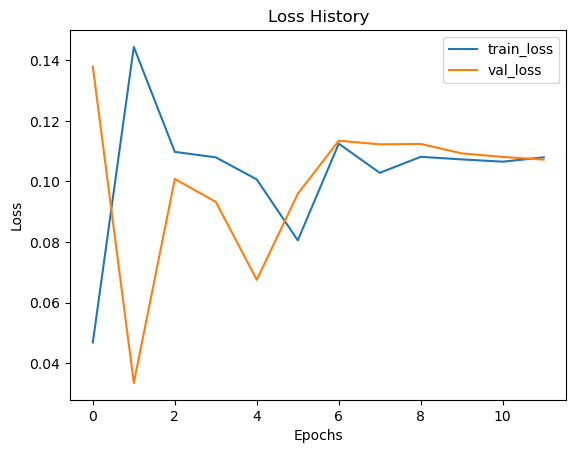

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

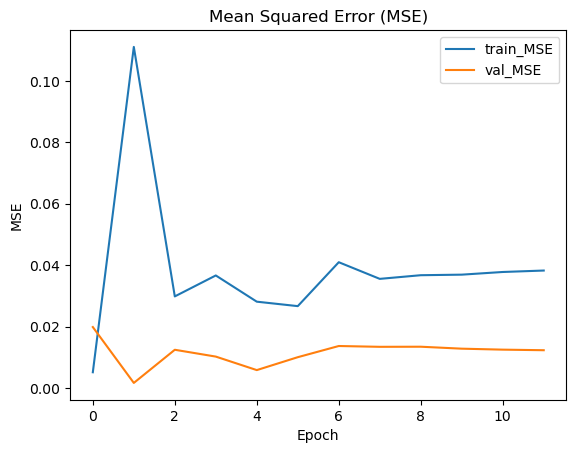

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

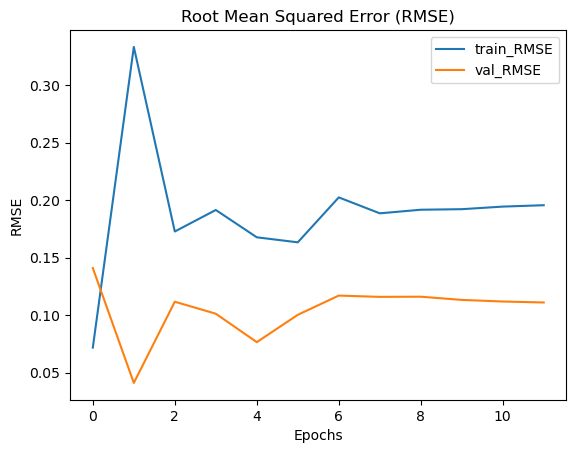

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

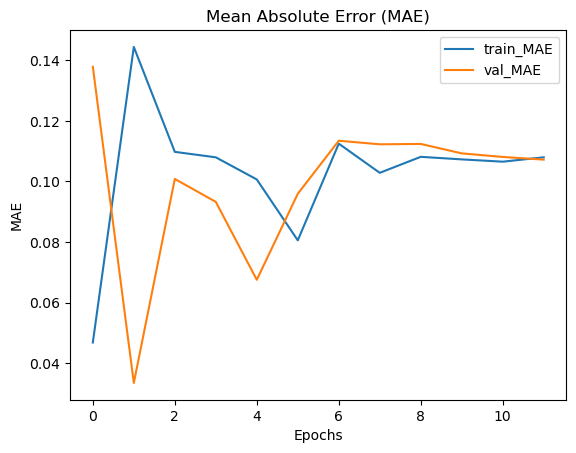

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

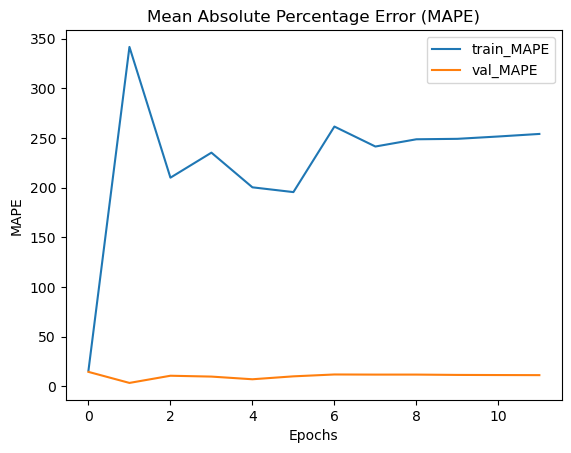

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:17:01.322115: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


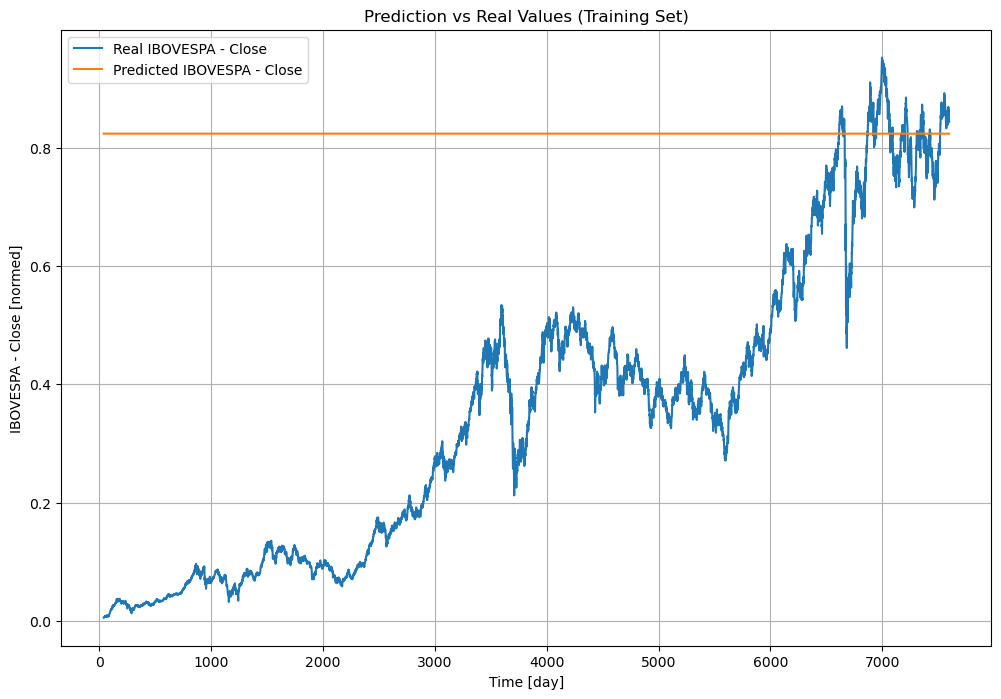

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


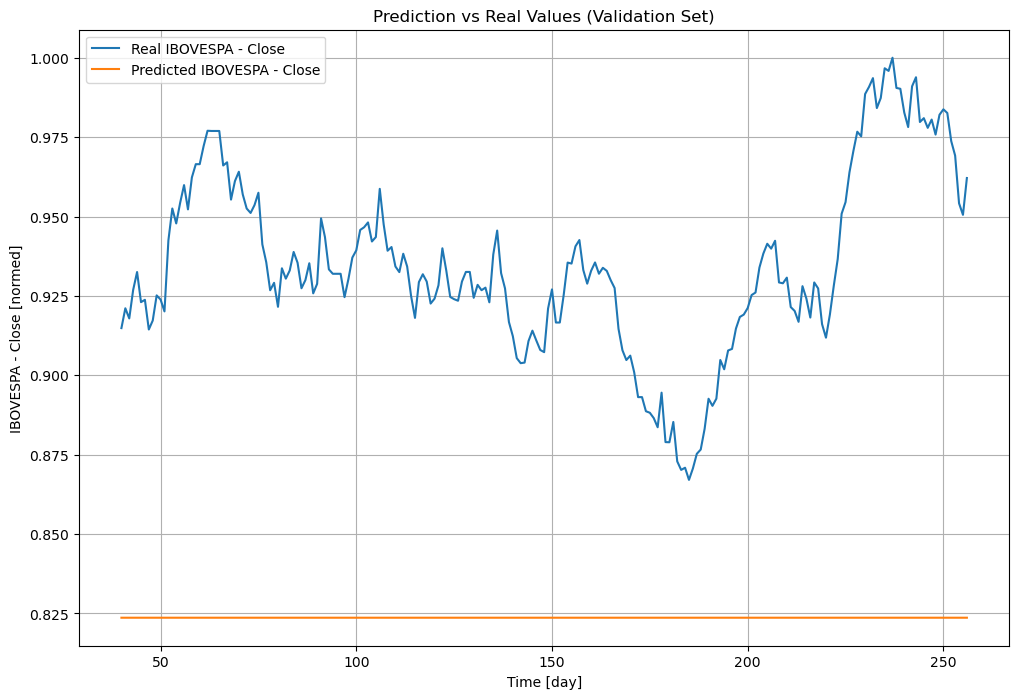

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


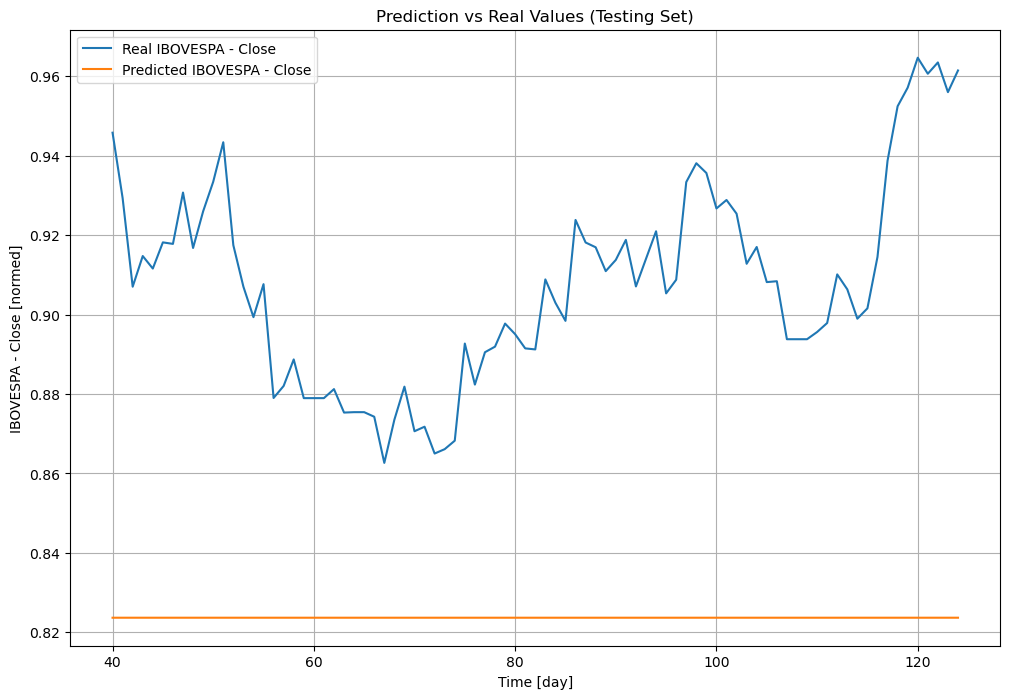

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

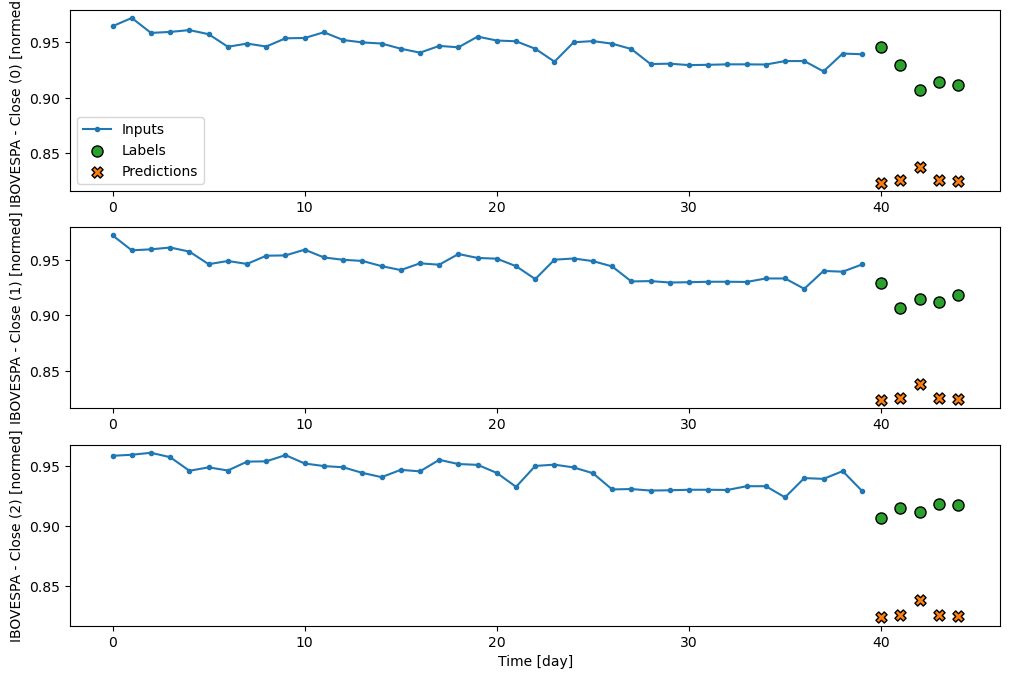

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:10s:437ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step


array([[[0.8236704 , 0.8236704 , 0.8236704 , ..., 0.8236704 ,
         0.8236704 , 0.8236704 ],
        [0.82597625, 0.82597625, 0.82597625, ..., 0.82597625,
         0.82597625, 0.82597625],
        [0.8379413 , 0.8379413 , 0.8379413 , ..., 0.8379413 ,
         0.8379413 , 0.8379413 ],
        [0.82567596, 0.82567596, 0.82567596, ..., 0.82567596,
         0.82567596, 0.82567596],
        [0.8249451 , 0.8249451 , 0.8249451 , ..., 0.8249451 ,
         0.8249456 , 0.8249456 ]],

       [[0.82367045, 0.82367045, 0.82367045, ..., 0.82367045,
         0.82367045, 0.82367045],
        [0.8259763 , 0.8259763 , 0.8259763 , ..., 0.8259763 ,
         0.8259763 , 0.8259763 ],
        [0.8379413 , 0.8379413 , 0.8379413 , ..., 0.8379413 ,
         0.8379413 , 0.8379413 ],
        [0.82567614, 0.82567614, 0.82567614, ..., 0.82567614,
         0.82567614, 0.82567614],
        [0.8249451 , 0.8249451 , 0.8249451 , ..., 0.8249451 ,
         0.8249457 , 0.8249457 ]],

       [[0.82367027, 0.82367027, 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')